In [1]:
from pathlib import Path
import numpy as np
from pathlib import Path
import dill
import importlib
import mstme.mstmeclass as mc
from scipy.spatial import KDTree

In [2]:
import sys

sys.modules['mstmeclass'] = mc

In [13]:
preset = 3
match preset:
    case 0:
        output="output"
        region = "guadeloupe"
        N_subsample = 100
        rf = "h-east"
        RECALC = False
        thr_pct_mar = 0.6
        thr_pct_com = 0.9
    case 1:
        output="output"
        region = "guadeloupe"
        N_subsample = 100
        rf = "h-west"
        RECALC = False
        thr_pct_mar = 0.6
        thr_pct_com = 0.65
    case 2:
        output="output-new"
        region = "guadeloupe-wide"
        N_subsample = 100
        rf = "h-east"
        RECALC = False
        thr_pct_mar = 0.6
        thr_pct_com = 0.9
    case 3:
        output="output-new"
        region = "guadeloupe-wide"
        N_subsample = 100
        rf = "h-west"
        RECALC = False
        thr_pct_mar = 0.6
        thr_pct_com = 0.70
    case 4:
        output="output-new"
        region = "guadeloupe-wide"
        N_subsample = 100
        rf = "none"
        RECALC = False
        thr_pct_mar = 0.6
        thr_pct_com = 0.70

# Region

# Cluster

In [14]:
path_out_condition = Path(
    f"J:/mstme/{output}/{region}/{rf}/"
)

# Pickle MSTME object for faster redraws
path_dill_condition = path_out_condition.joinpath(f"mstme_cluster.dill")
if path_dill_condition.exists():
    with path_dill_condition.open("rb") as f:
        mstme_condition:mc.MSTME = dill.load(f)
        print(
            f"MSTME Dill found for {rf}, GP{round(thr_pct_mar*100)}%_CM{round(thr_pct_com*100)}%!"
        )

MSTME Dill found for h-west, GP60%_CM70%!


In [15]:
path_out_condition = Path(
    f"J:/mstme/{output}/{region}/{rf}/GP{round(thr_pct_mar*100)}%_CM{round(thr_pct_com*100)}%_100subsamples/"
)

# Pickle MSTME object for faster redraws
path_dill_condition = path_out_condition.joinpath(f"mstme_condition.dill")
if path_dill_condition.exists():
    with path_dill_condition.open("rb") as f:
        mstme_condition:mc.MSTME = dill.load(f)
        print(
            f"MSTME Dill found for {rf}, GP{round(thr_pct_mar*100)}%_CM{round(thr_pct_com*100)}%!"
        )
# Pickle STM_ss object for faster redraws
path_dill_ss = path_out_condition.joinpath(f"mstme_ss_100_pool_200.dill")
if path_dill_ss.exists():
    with path_dill_ss.open("rb") as f:
        tm_MSTME_ss, stm_MSTME_ss = dill.load(f)
        print(
            f"STM_ss Dill found for {rf}, GP{round(thr_pct_mar*100)}%_CM{round(thr_pct_com*100)}%!"
        )

MSTME Dill found for h-west, GP60%_CM70%!
STM_ss Dill found for h-west, GP60%_CM70%!


No events above marginal threshold: [17.77777778 48.88888889]


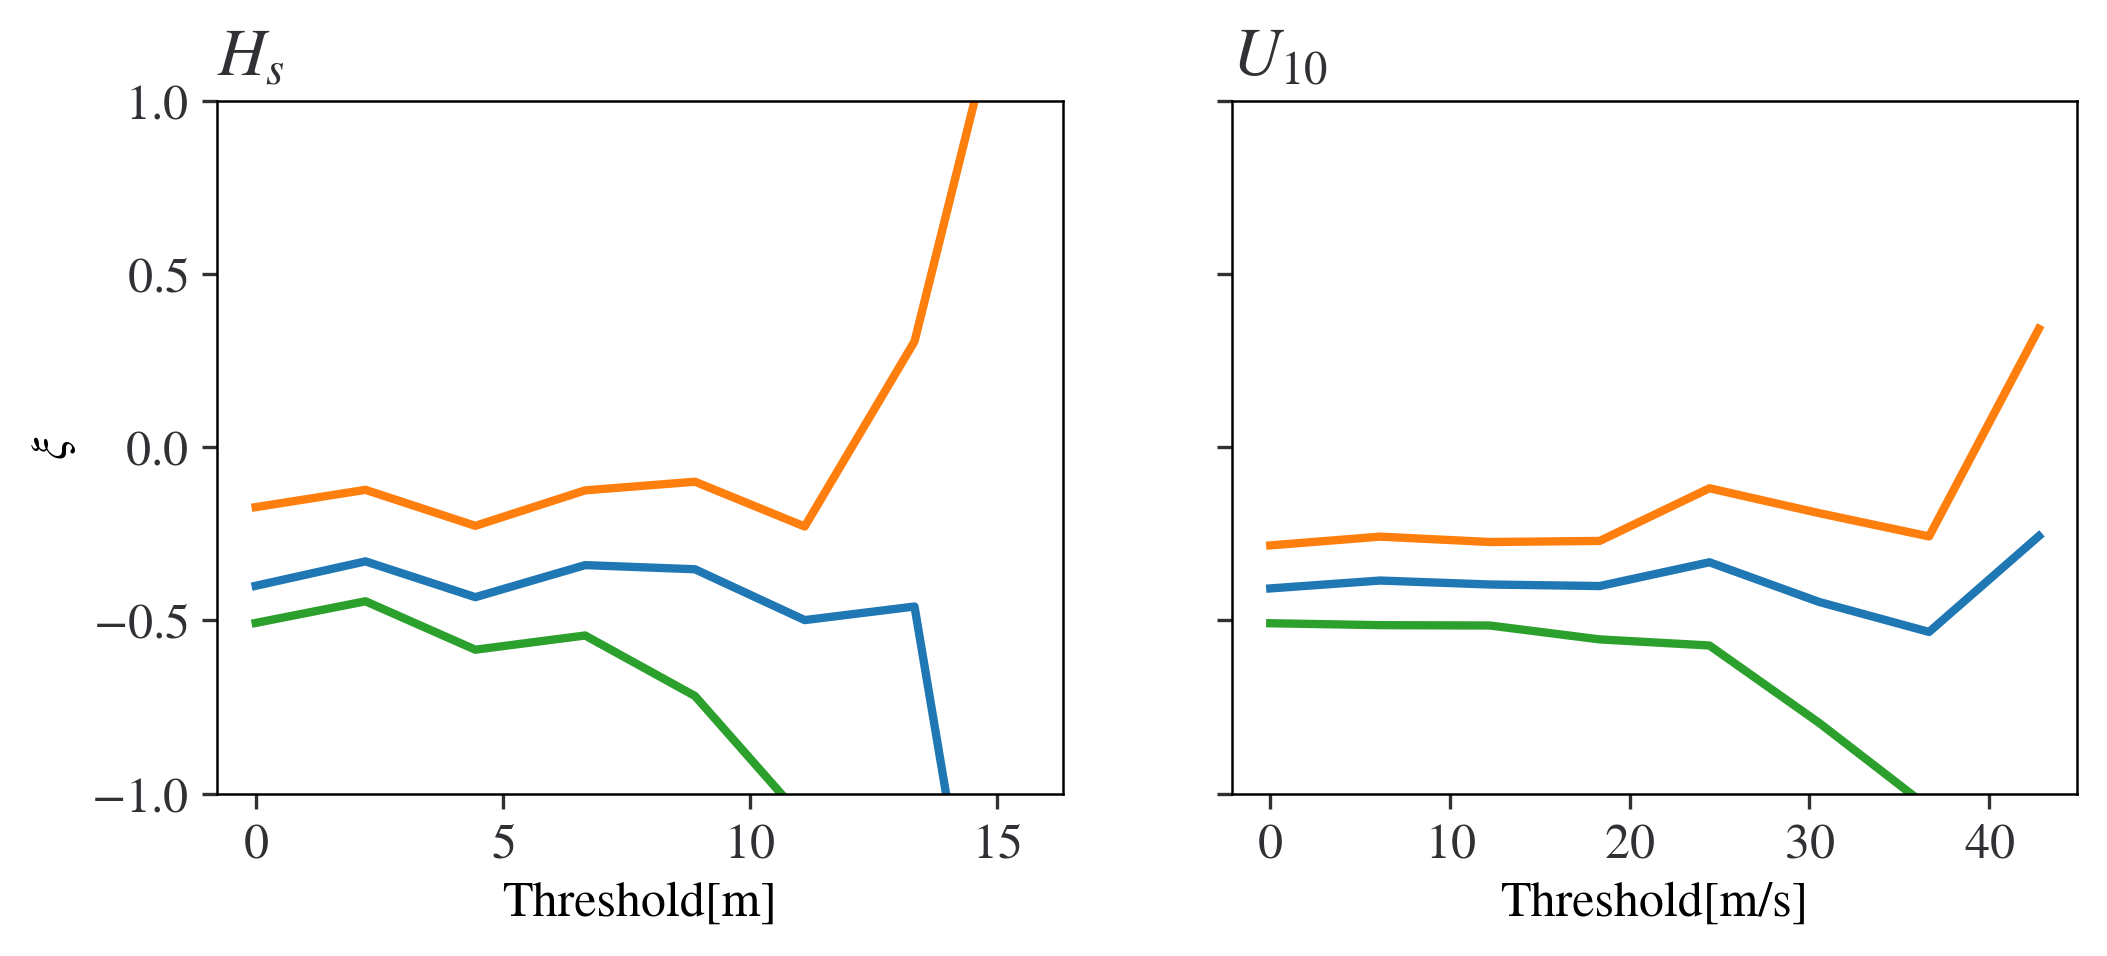

In [31]:
mstme_condition.search_marginal([0, 0], [20, 55])

In [16]:
import mstme.grapher as grapher
sys.modules["grapher"] = grapher

In [17]:
importlib.reload(grapher)
grapher_condition = grapher.Grapher(mstme_condition)

In [9]:
grapher_condition.mstme.dir_out

'output-new\\guadeloupe-wide\\none'

In [10]:
tree = KDTree(mstme_condition.latlon)
grid_res = 10
lat_list = np.linspace(15.80, 16.60, grid_res)
lon_list = np.linspace(-62.00,-60.80, grid_res)
dist_list, pos_list = tree.query(
    [[[lat, lon] for lat in lat_list] for lon in lon_list]
)
# lat_list = np.linspace(mstme_condition.area.min_lat, mstme_condition.area.max_lat, grid_res)
# lon_list = np.linspace(mstme_condition.area.min_lon, mstme_condition.area.max_lon, grid_res)
# dist_list, pos_list = tree.query(
#     [[[lat, lon] for lat in lat_list] for lon in lon_list]
# )
pos_list = pos_list.flatten()
pos_list = np.unique(pos_list)


In [11]:
tree_pwe = KDTree(mstme_condition.latlon[pos_list, :])
_, idx_list_pwe = tree_pwe.query(
    [
        [16.5,-61.8],
        [16.0,-61.9],
        [16.05,-61.4],
        [16.0,-61.0],
        [16.5,-61.1],
    ]
)
idx_list_pwe = idx_list_pwe.flatten()
idx_list_pwe = np.unique(idx_list_pwe)
pos_list_pwe = pos_list[idx_list_pwe]


In [12]:
####OVERRIDE
# from the guadeloupe(not wide) 5 locations
latlon_list_pwe = np.array(
    [
        [15.962273, -61.86822],
        [16.506672, -61.0656],
        [15.9812355, -61.063473],
        [16.506403, -61.859367],
        [16.069033, -61.466587],
    ]
)
tree_pwe_original = KDTree(mstme_condition.latlon)
_, pos_list_pwe = tree_pwe_original.query(latlon_list_pwe)
_,idx_list_pwe=tree_pwe.query(latlon_list_pwe)

findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Font family 'sans-serifr' not found.
findfont: Fon

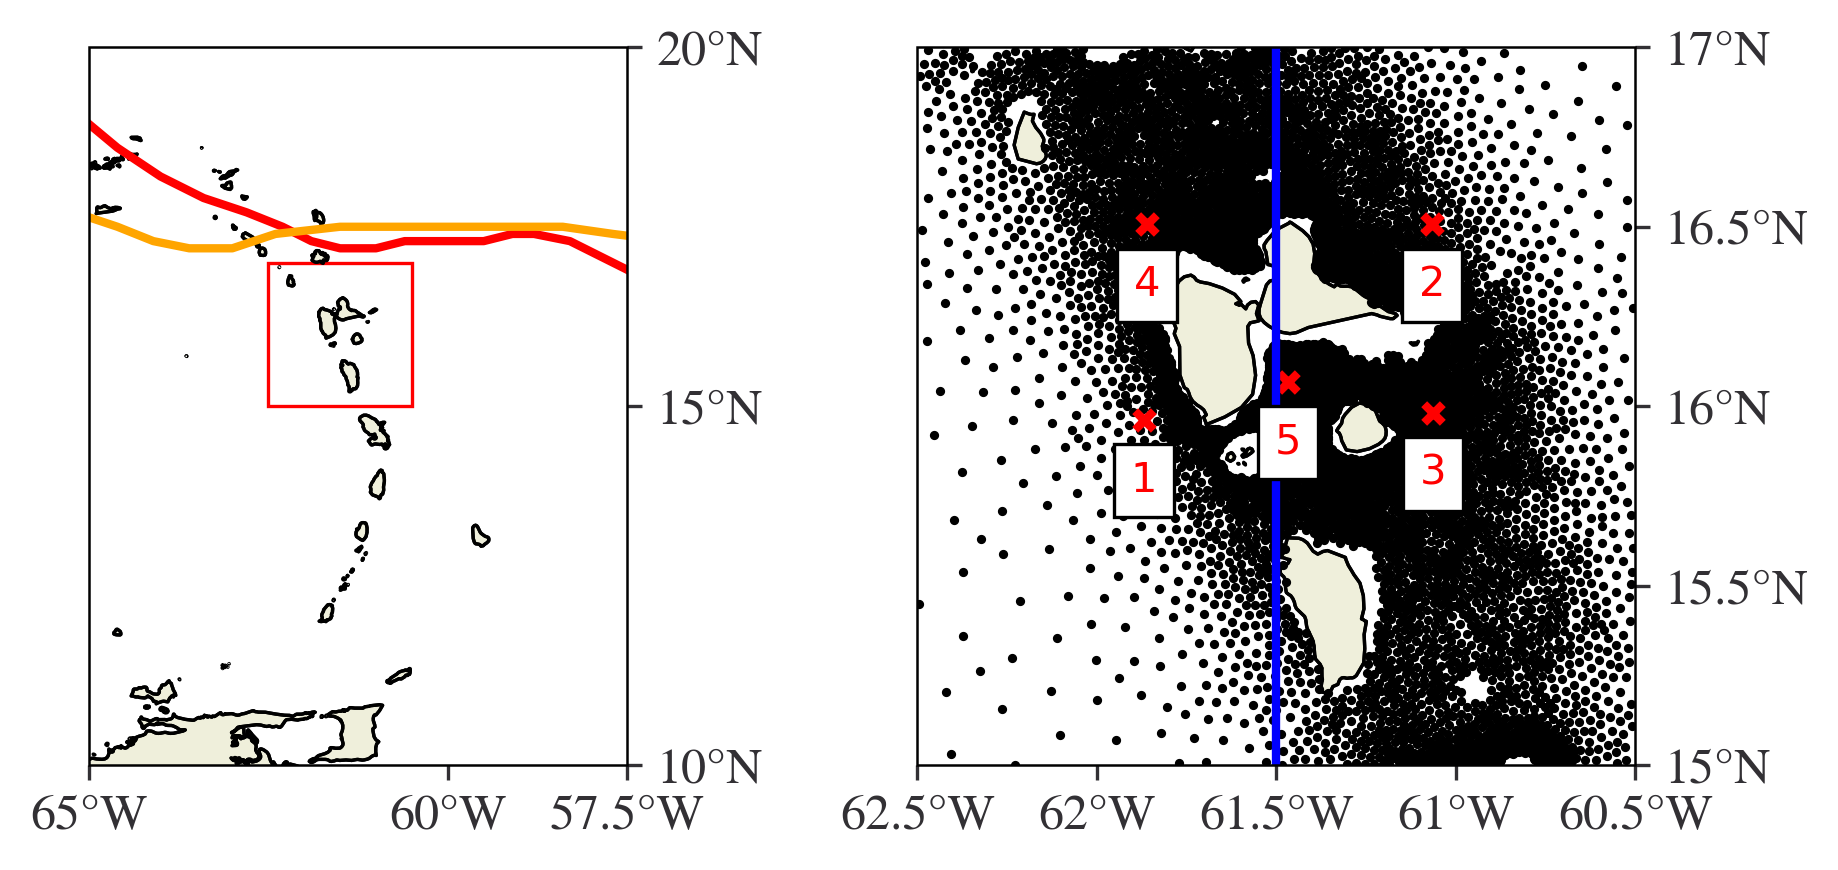

In [15]:
_ = grapher.Grapher(mstme_condition).draw(
    "General_Map_4",
    pos_list=pos_list_pwe,
    events=[0,1],
    draw_fig=True,
    node_size=2,
)

[25, 24]
[50.09538504 49.33636405 48.75454296 48.24000041 43.71999817 49.50461285
 42.9039978  48.75454296 48.26699753 48.26699753 48.24000041 44.29599915
 47.67110867 41.5274992  48.75454296 47.67110867 47.79428428 48.75454296
 48.84300041 42.9039978  46.51714325 49.16083082 48.26699753 47.67110867
 46.9262476  48.75454296 50.09538504 45.96856907 46.9262476  47.67110867
 48.26699753 45.96856907 48.26699753 47.67110867 45.96856907 49.50461285
 45.22500038 47.67110867 48.44874907 50.44615173 48.26699753 45.96856907
 46.9262476  48.24000041 46.51714325 48.26699753 49.16083082 42.9039978
 48.75454296 46.9262476  45.96856907 46.9262476  44.69166438 48.75454296
 46.51714325 47.67110867 43.41600037 46.9262476  48.26699753 48.75454296
 47.67110867 48.26699753 48.75454296 45.22500038 48.26699753 47.67110867
 43.41600037 48.75454296 44.69166438 44.69166438 45.96856907 48.75454296
 47.67110867 50.39357185 46.9262476  49.16083082 48.84300041 46.9262476
 44.69166438 47.67110867 46.9262476  48.2400

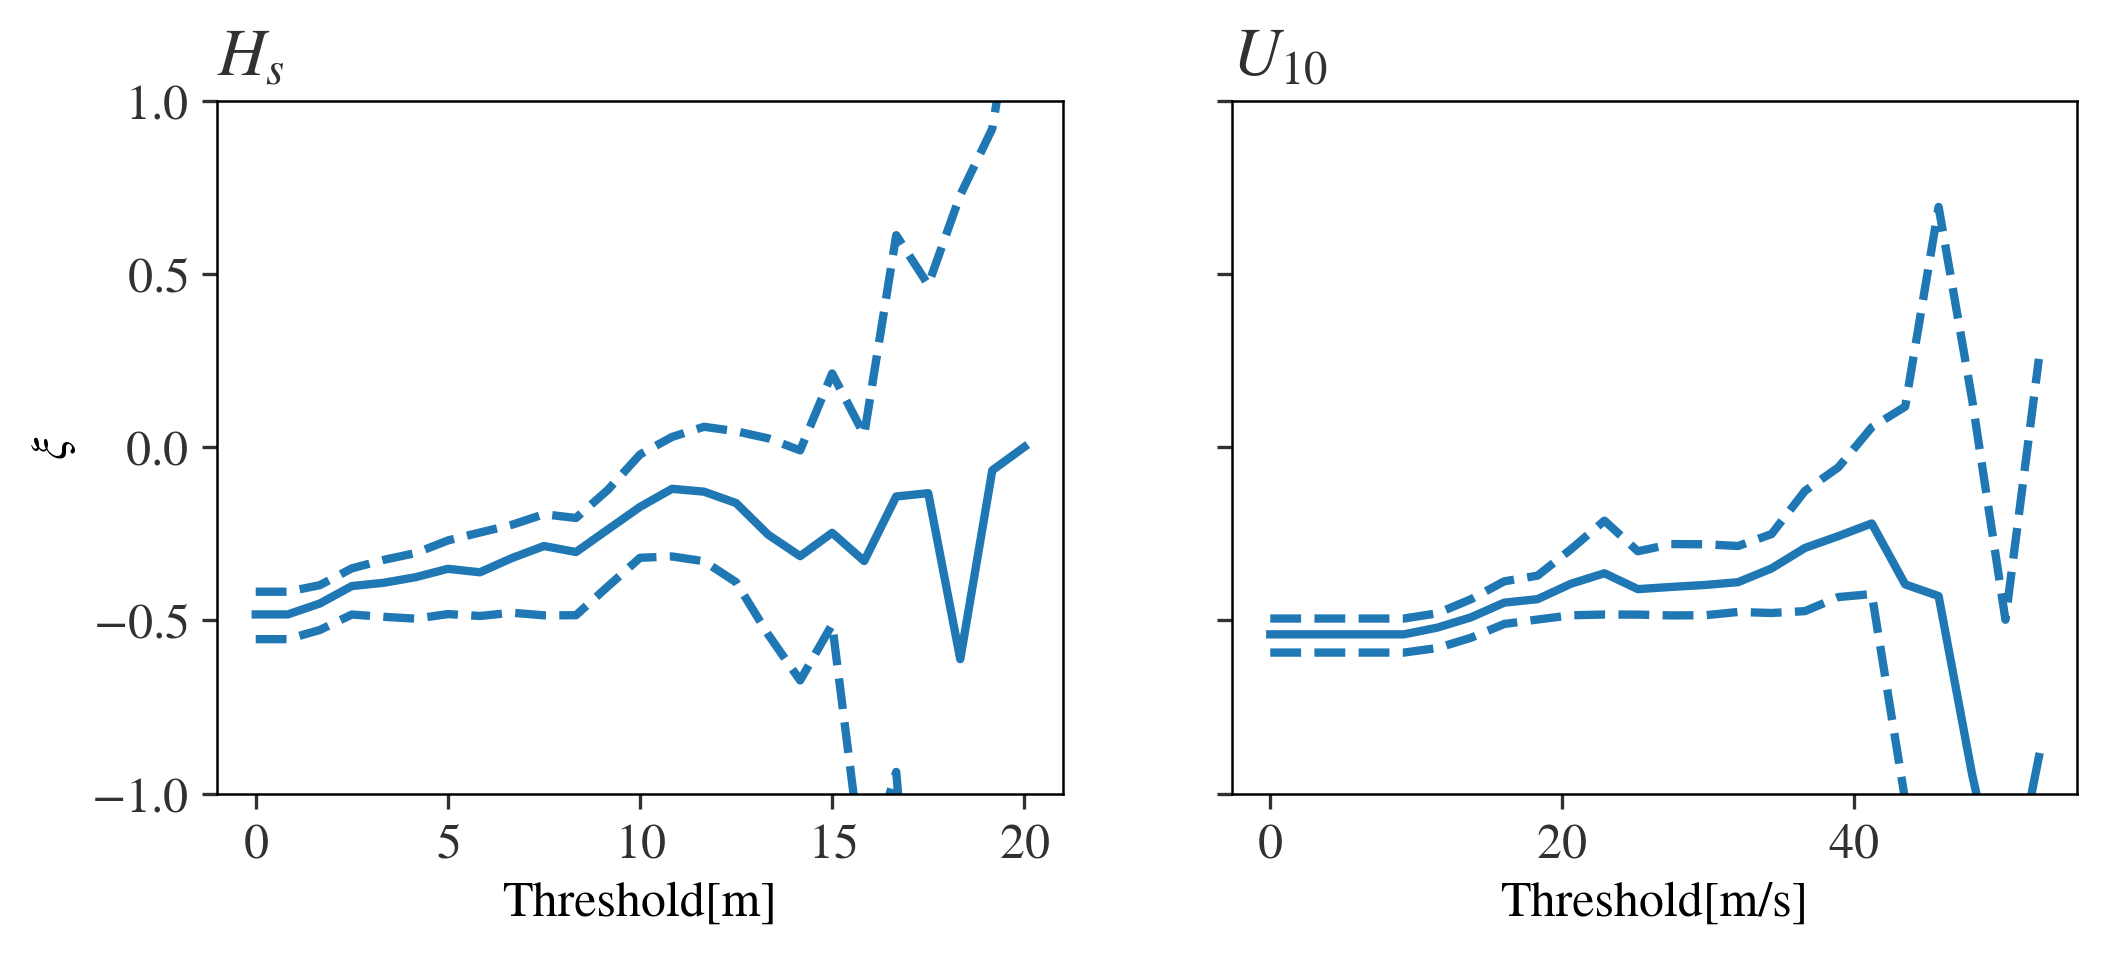

In [9]:
_ = grapher_condition.draw("Threshold_search_marginal",thr_start=[0,0],thr_end=[20,55],N_thr=25,draw_fig=True)

AttributeError: 'MSTME' object has no attribute 'params_mean'

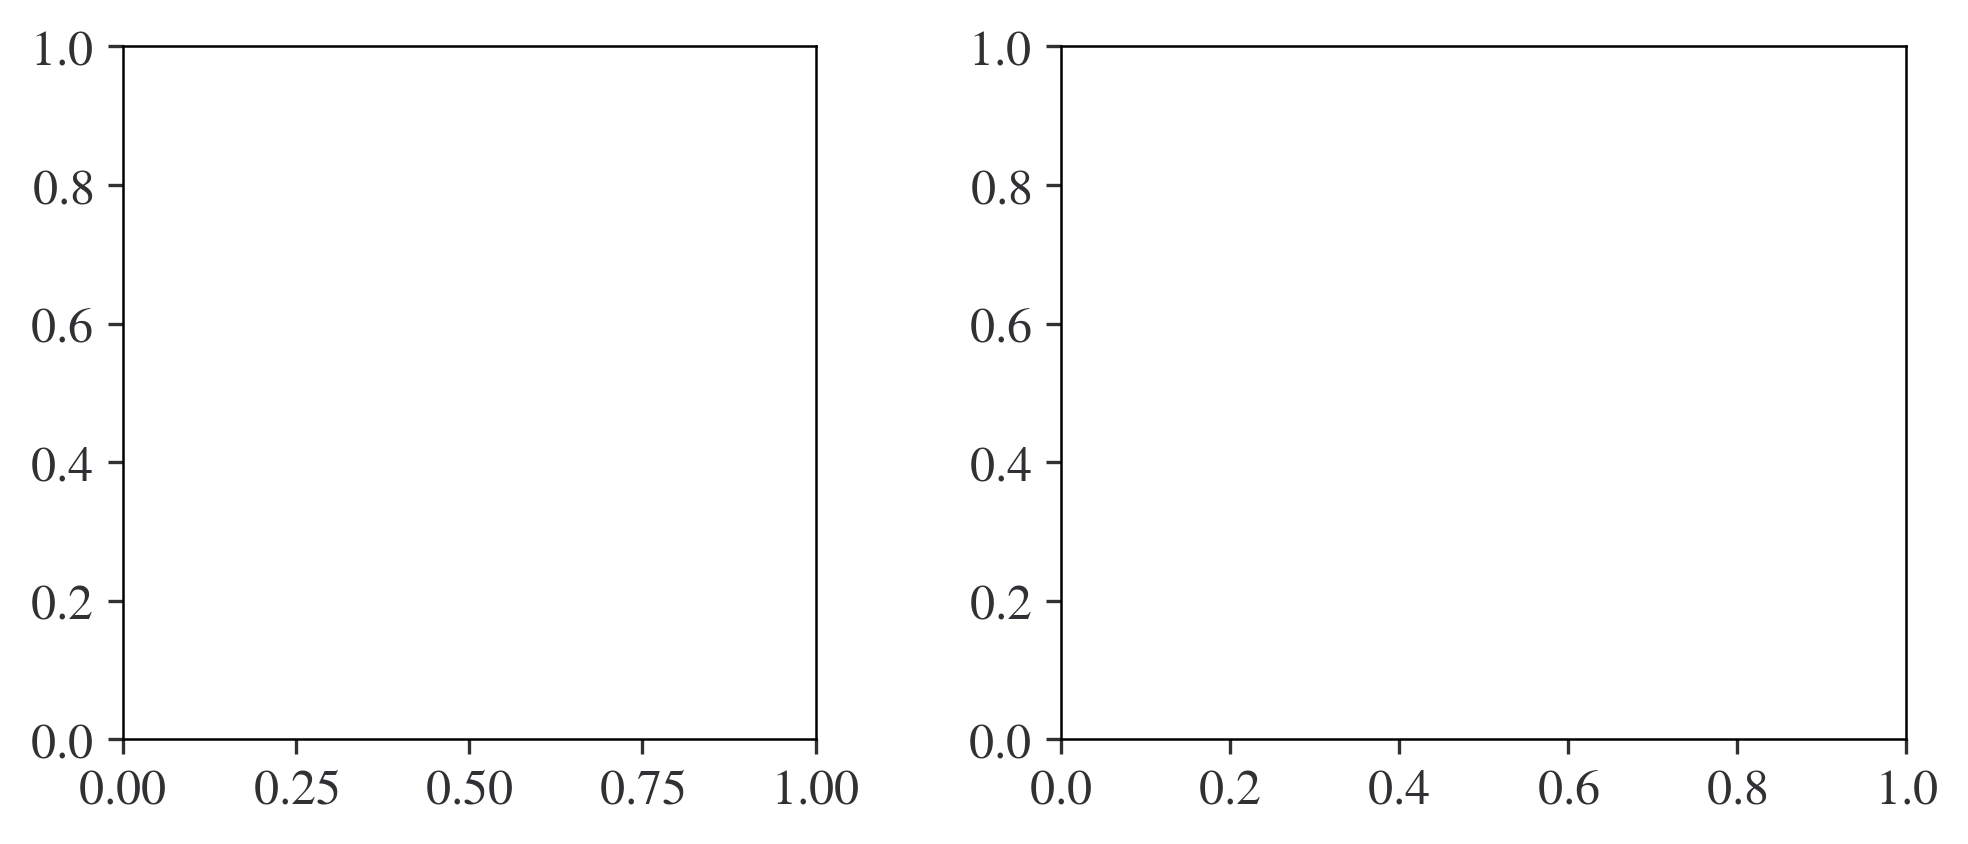

In [11]:
_ =grapher_condition.draw("Simulated_Conmul_vs_Back_Transformed_2",draw_fig=True)
# grapher_condition.draw("Simulated_Conmul_vs_Back_Transformed",draw_fig=True,dir_out=Path(fr"J:\mstme\output\guadeloupe-wide\{rf}\GP{round(thr_pct_mar*100)}%_CM{round(thr_pct_com*100)}%_100subsamples"))

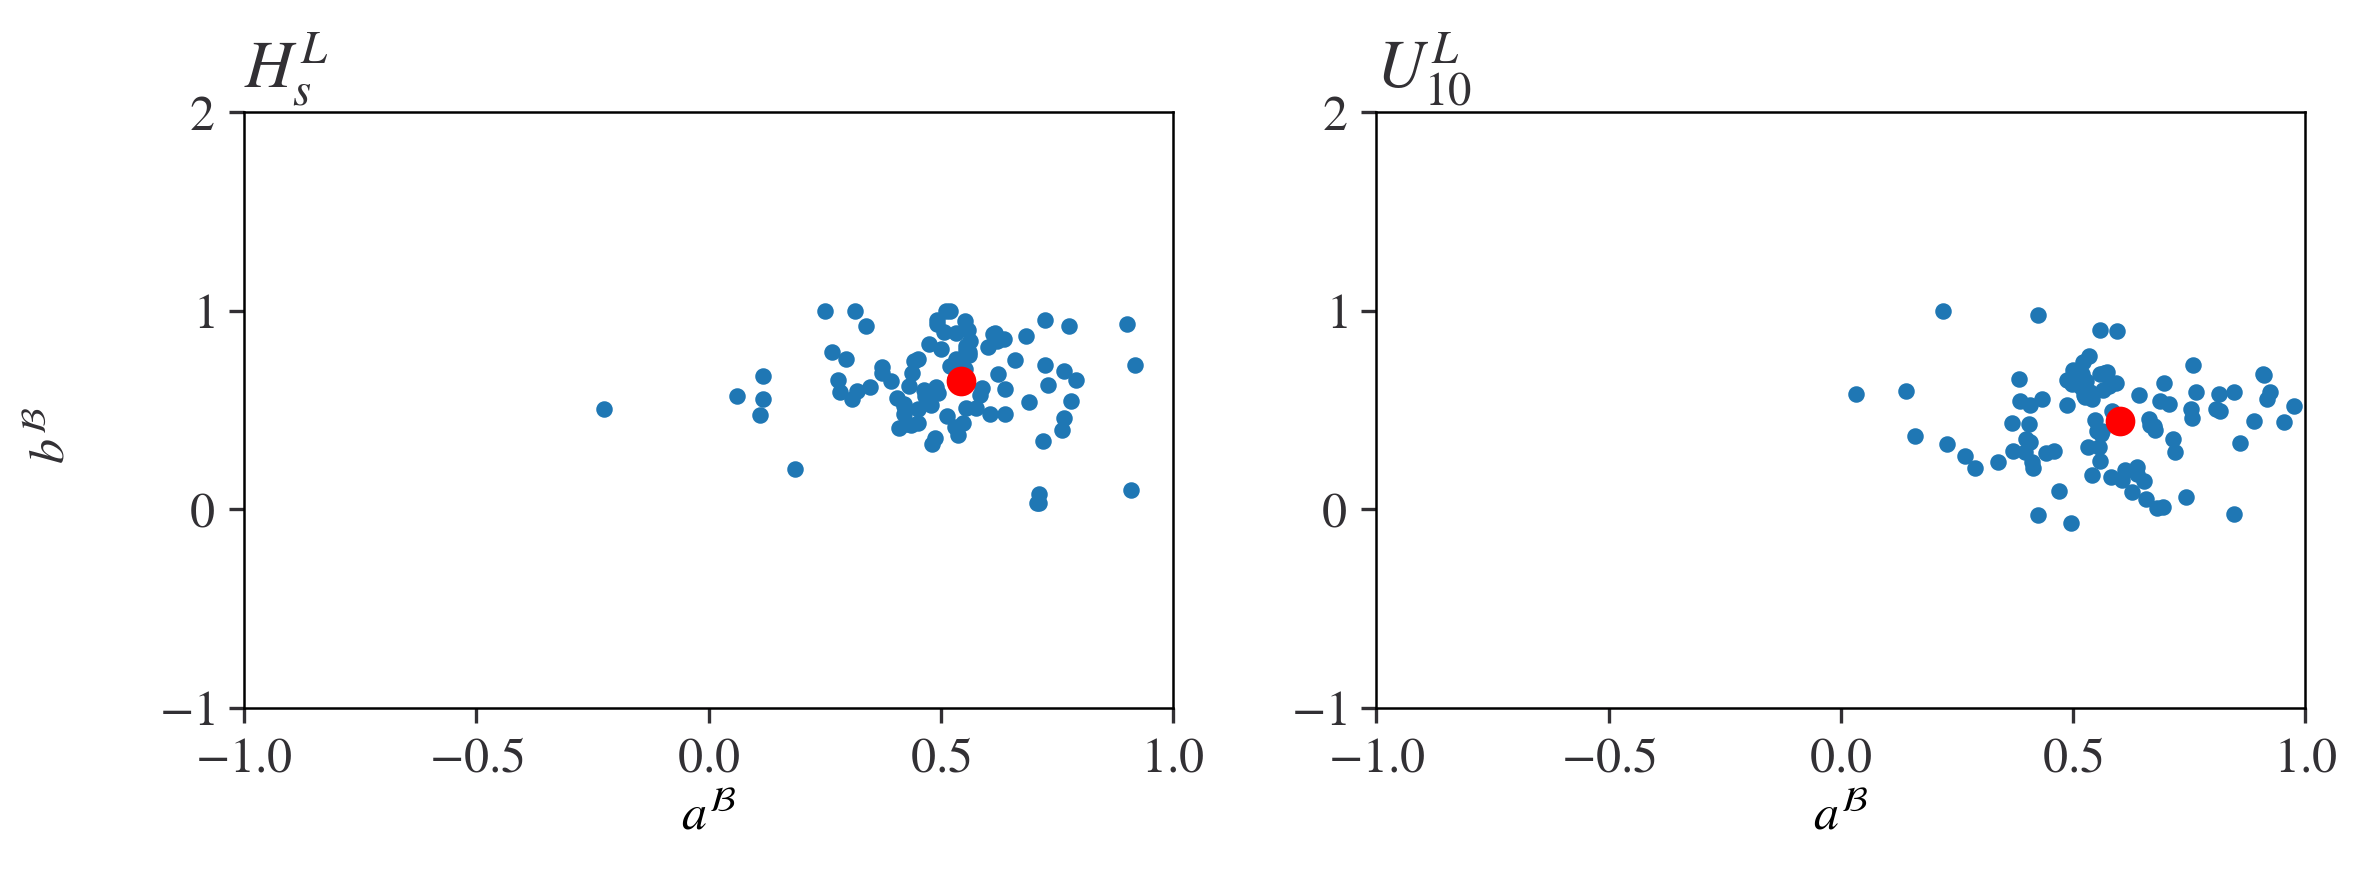

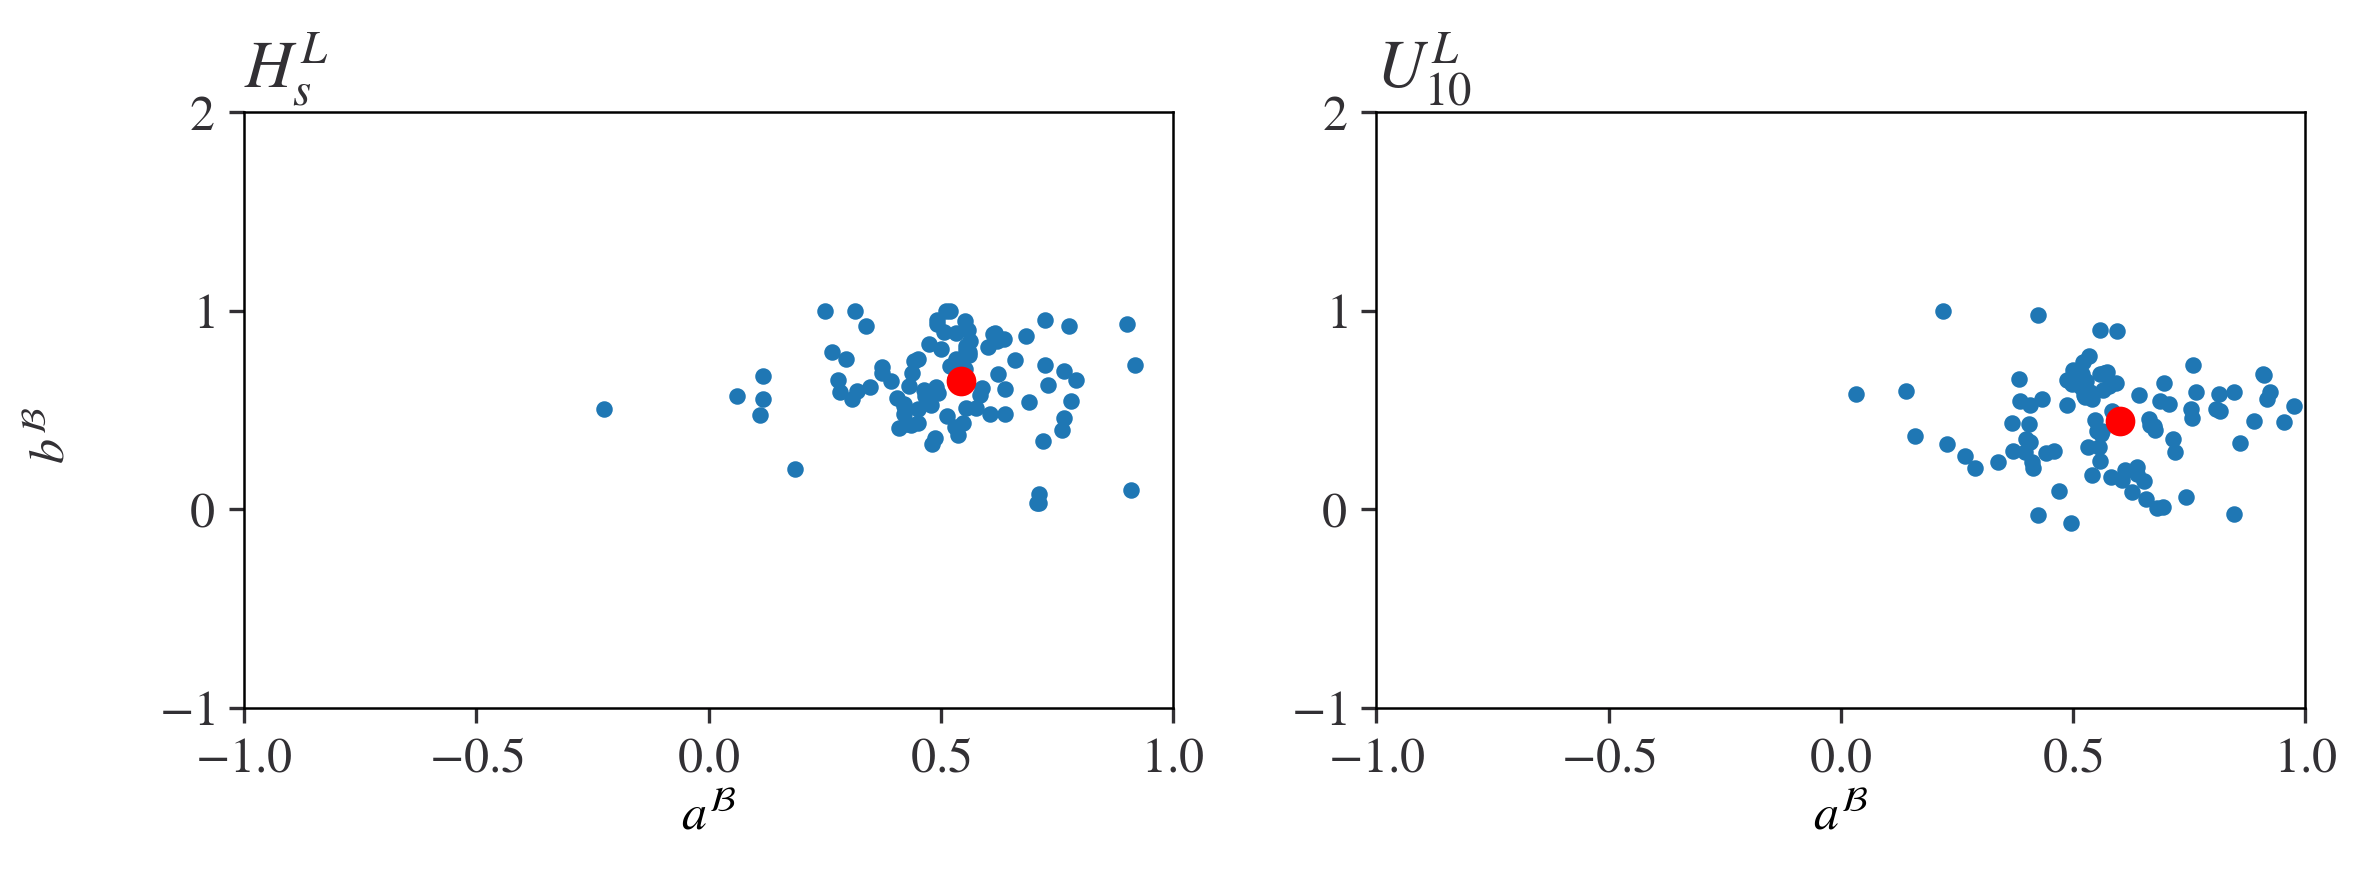

In [18]:
grapher_condition.draw("ab_Estimates",draw_fig=True)

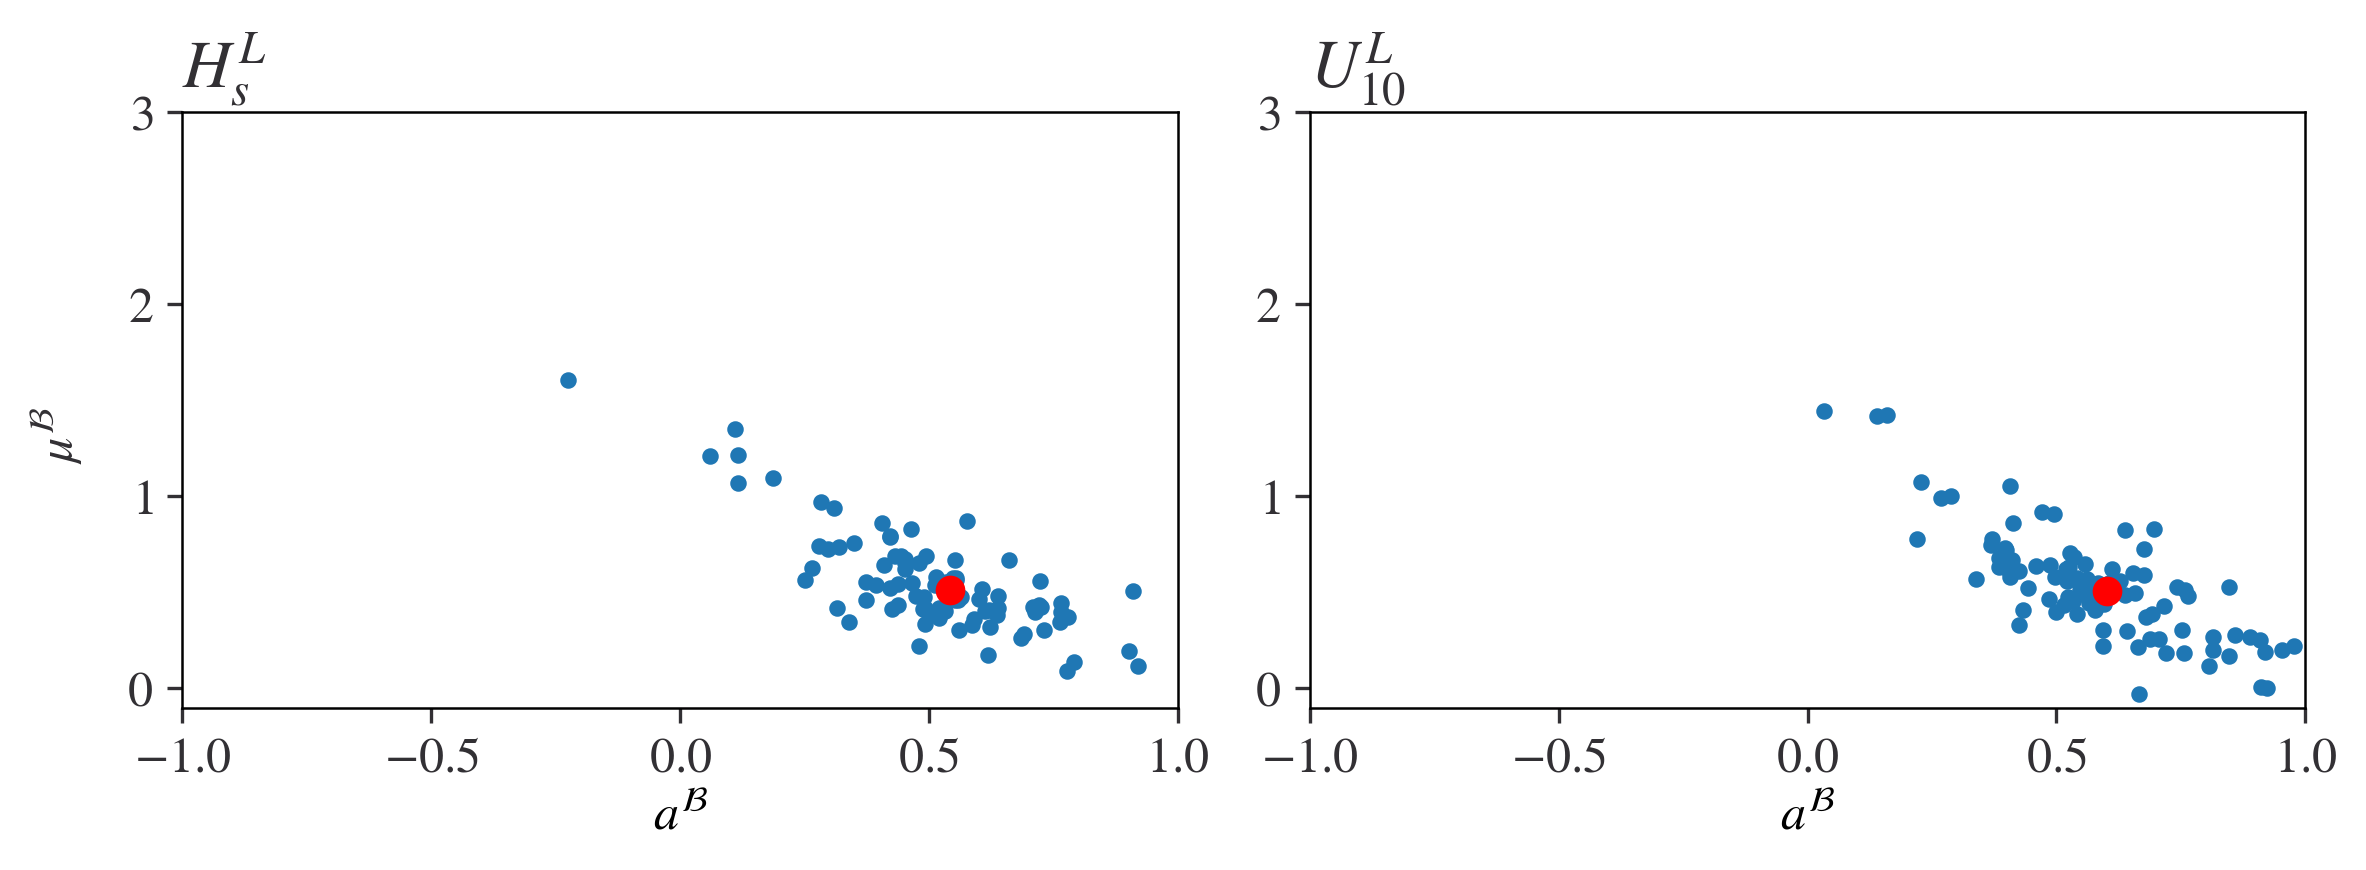

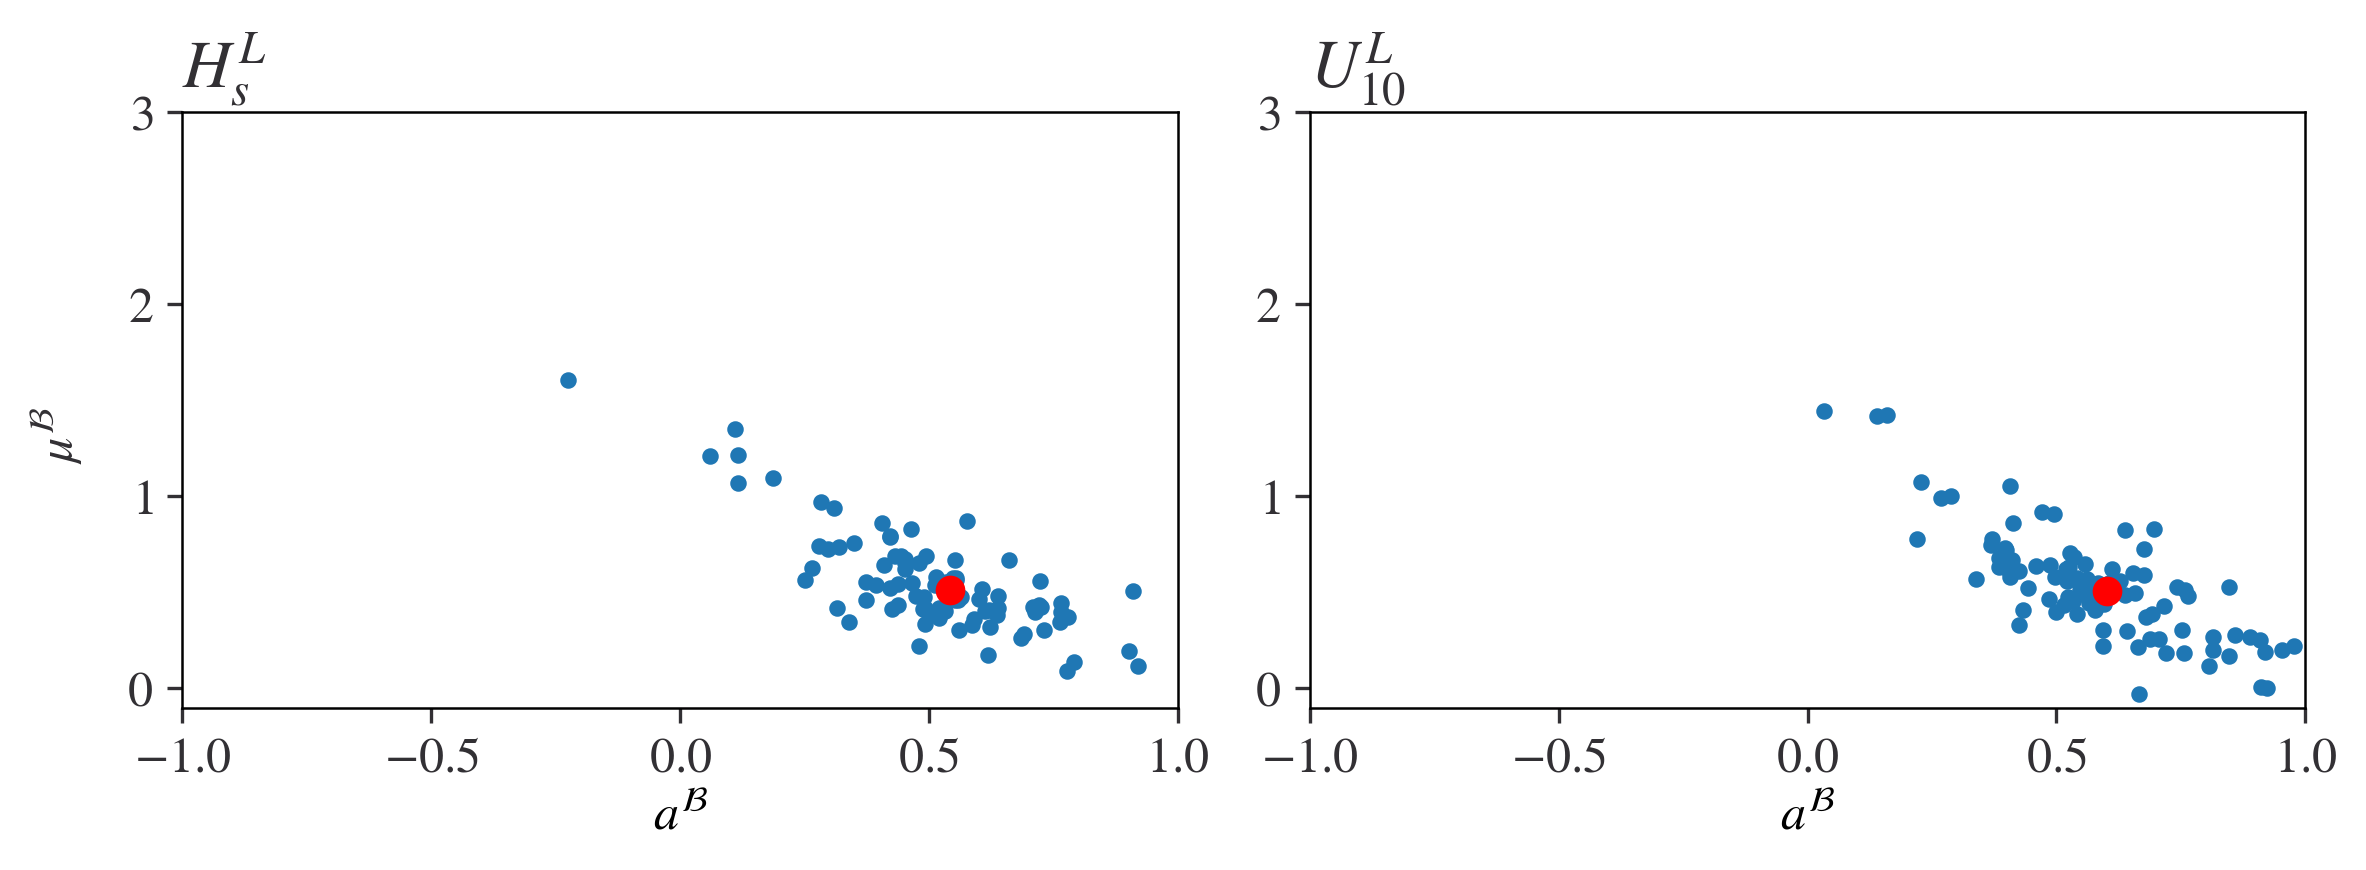

In [19]:
grapher_condition.draw("amu_Estimates",draw_fig=True)


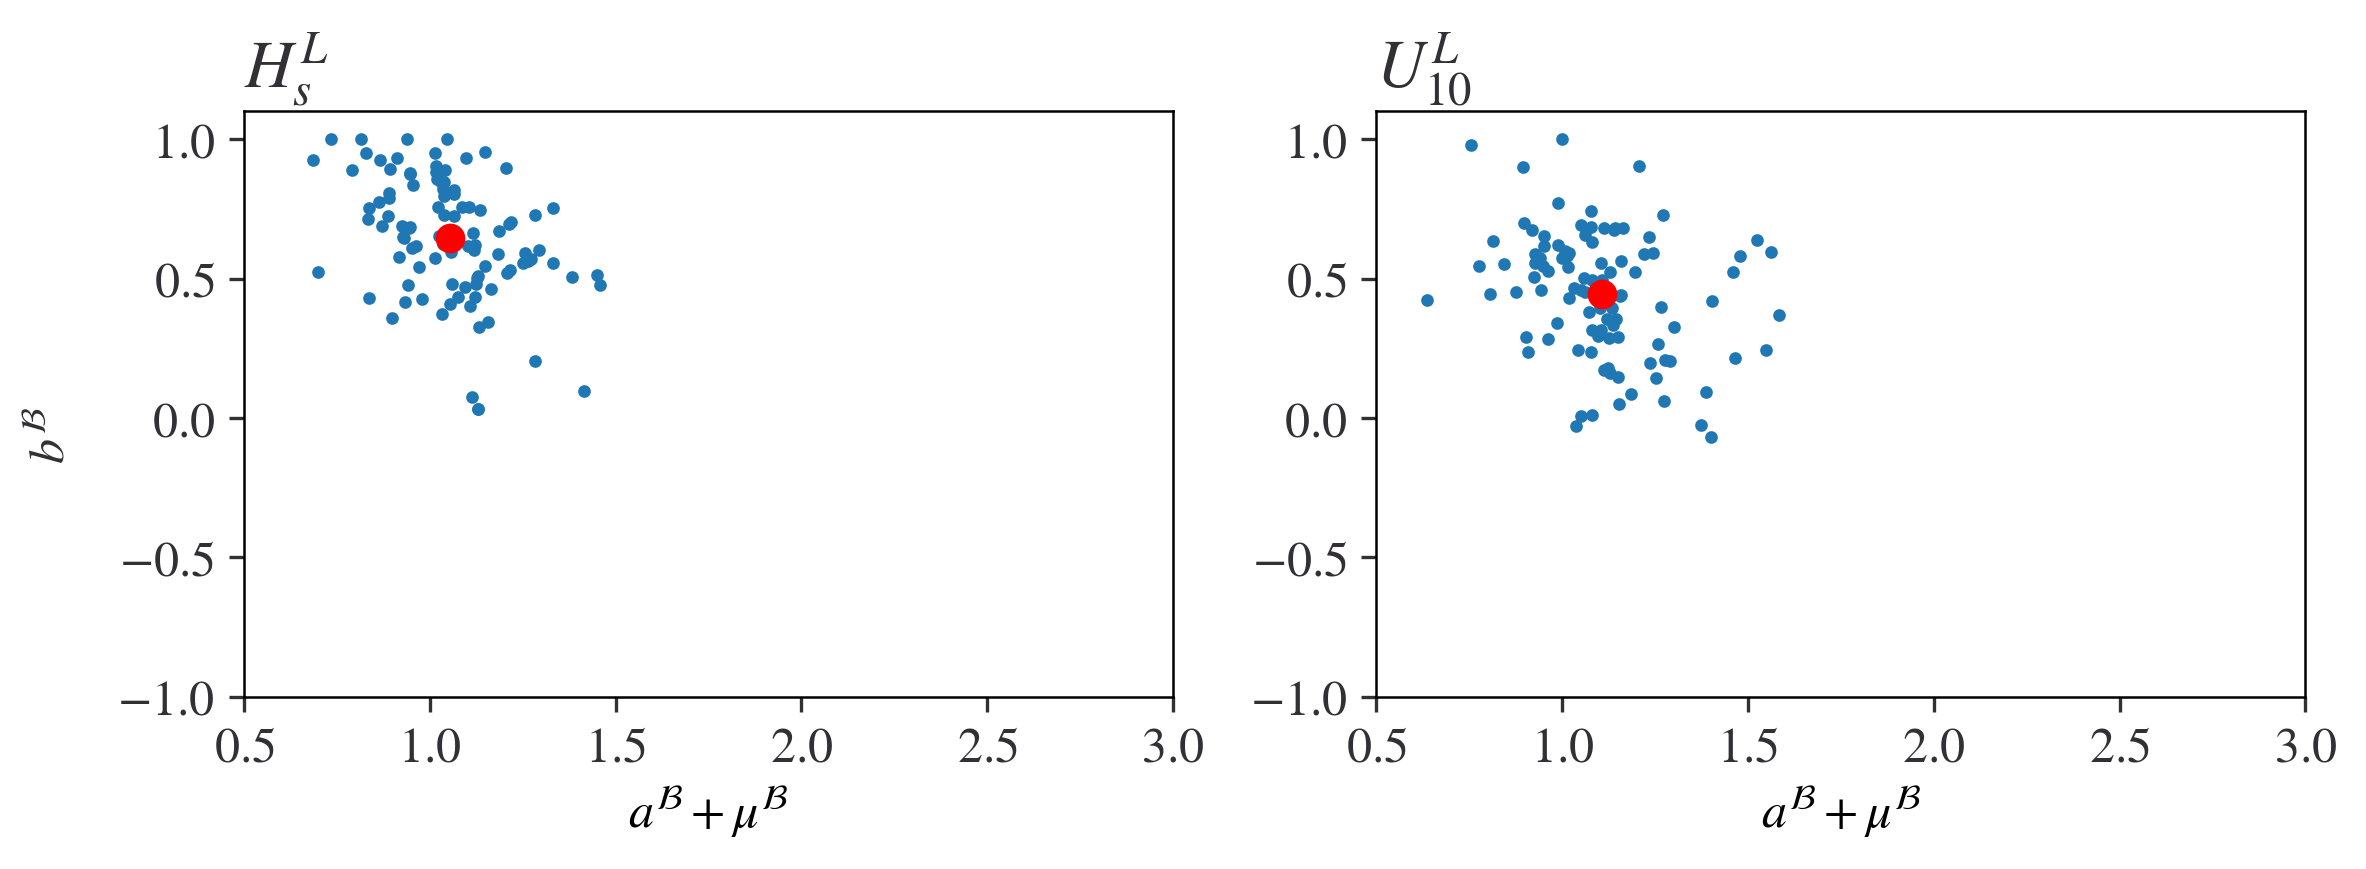

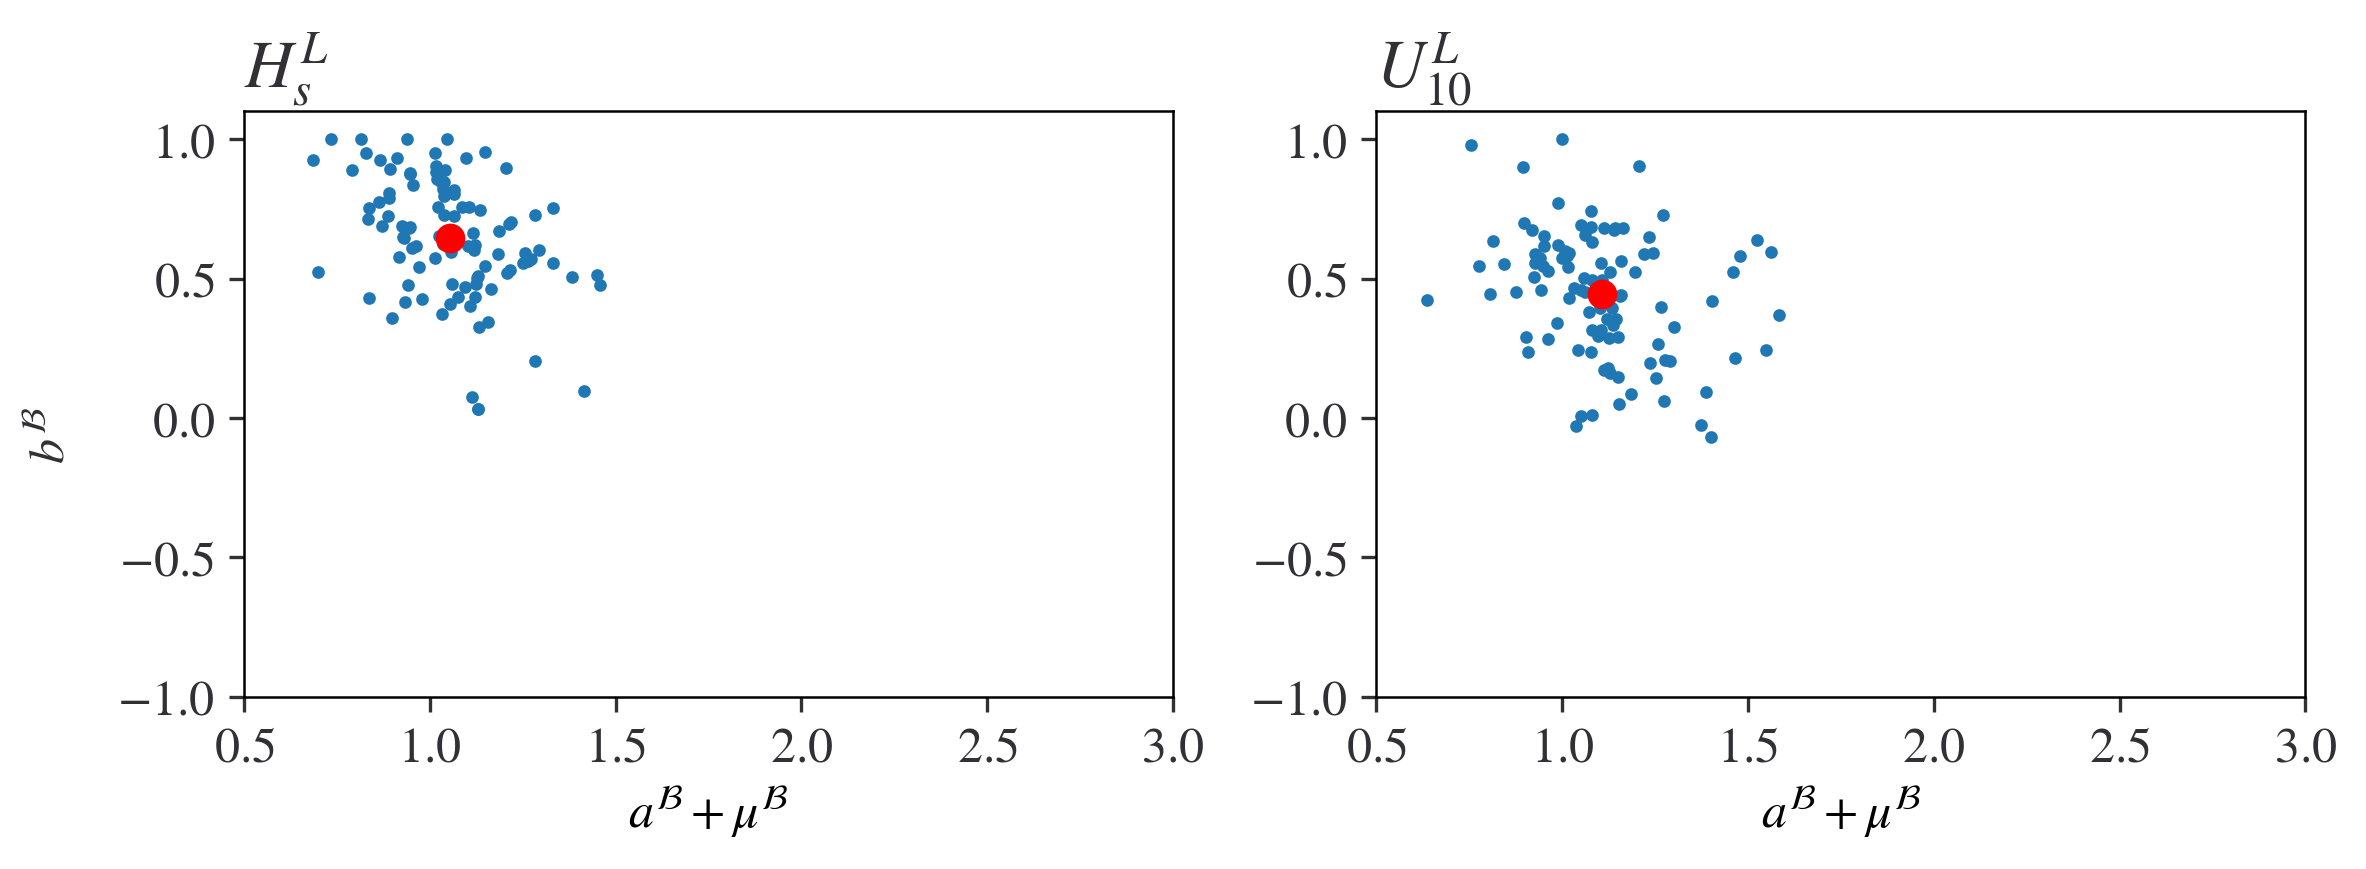

In [20]:
grapher_condition.draw("a+mub_Estimates",draw_fig=True)

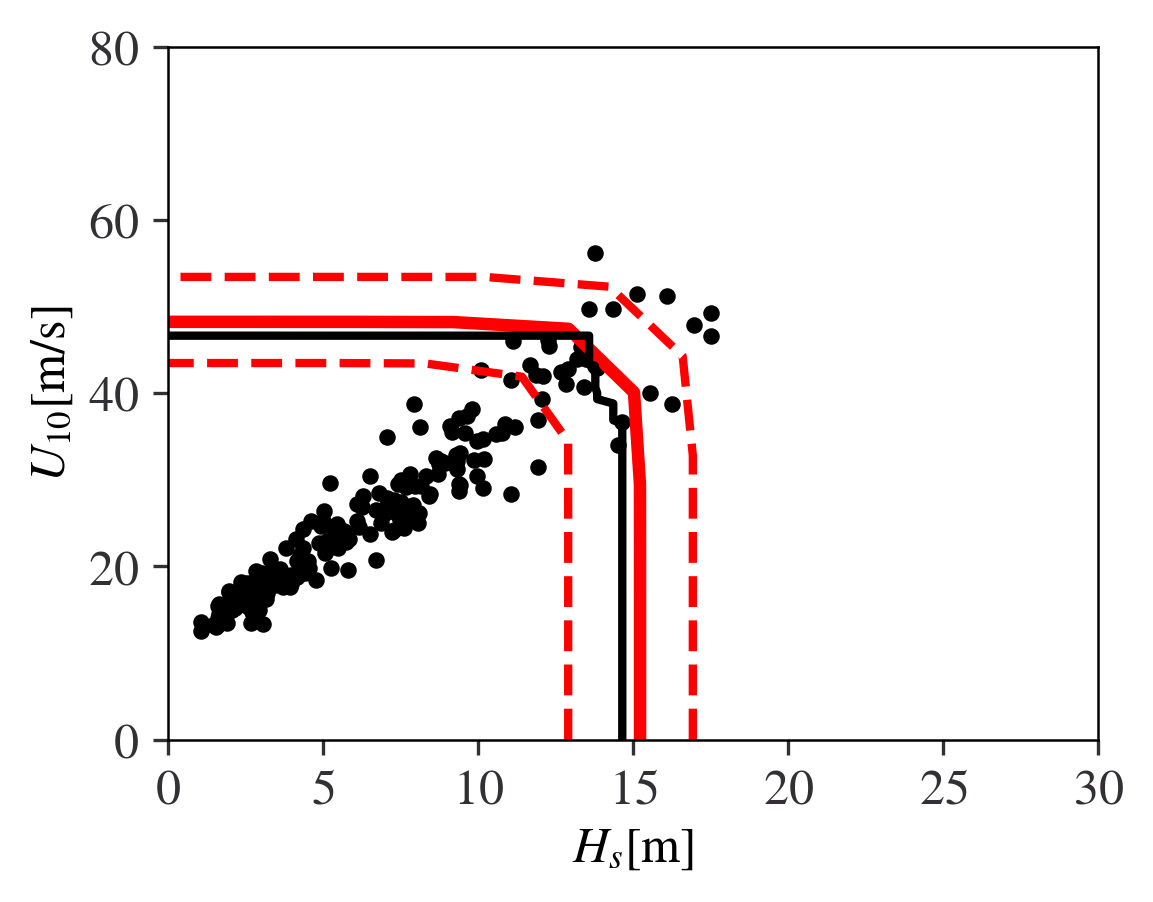

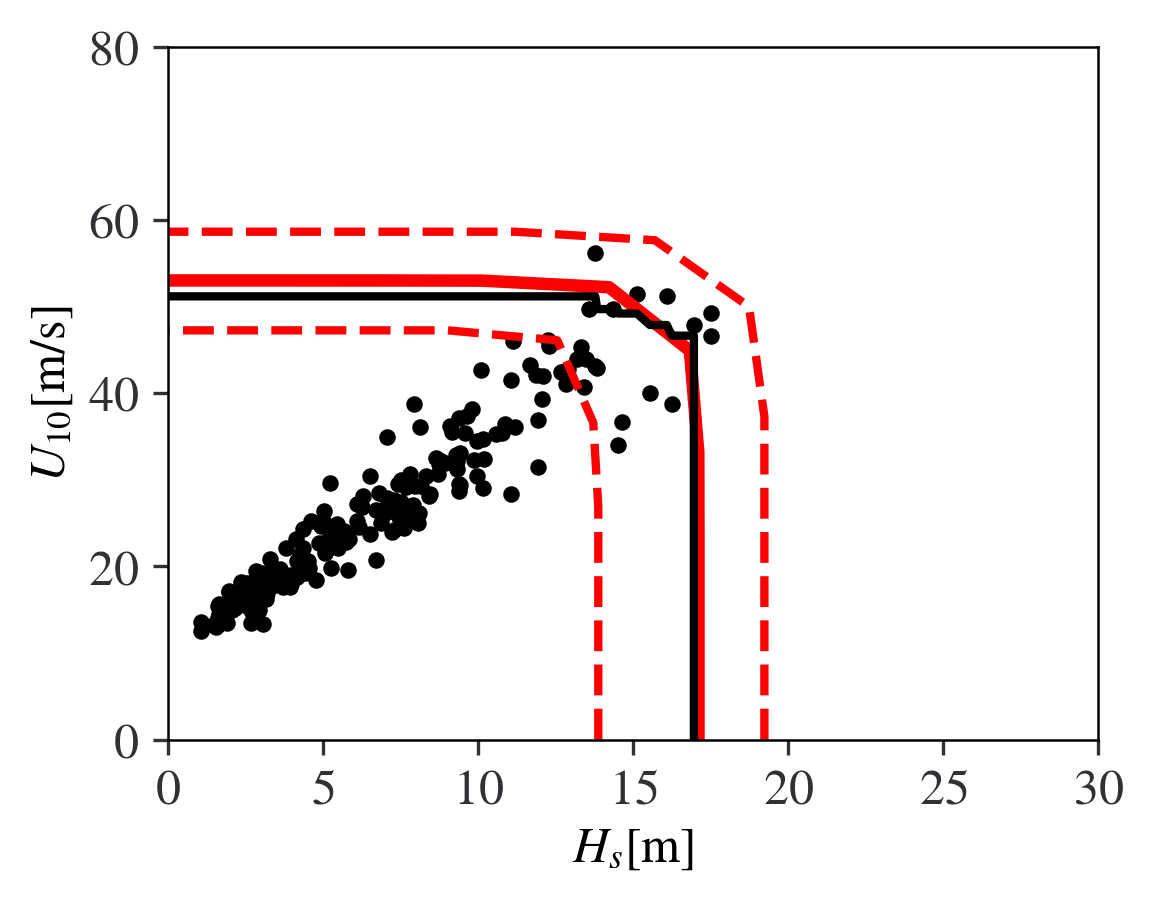

In [12]:
for rp in [100,300]:
  grapher_condition.draw("RV_STM", return_period=rp, stm_MSTME_ss=stm_MSTME_ss, draw_fig=True)

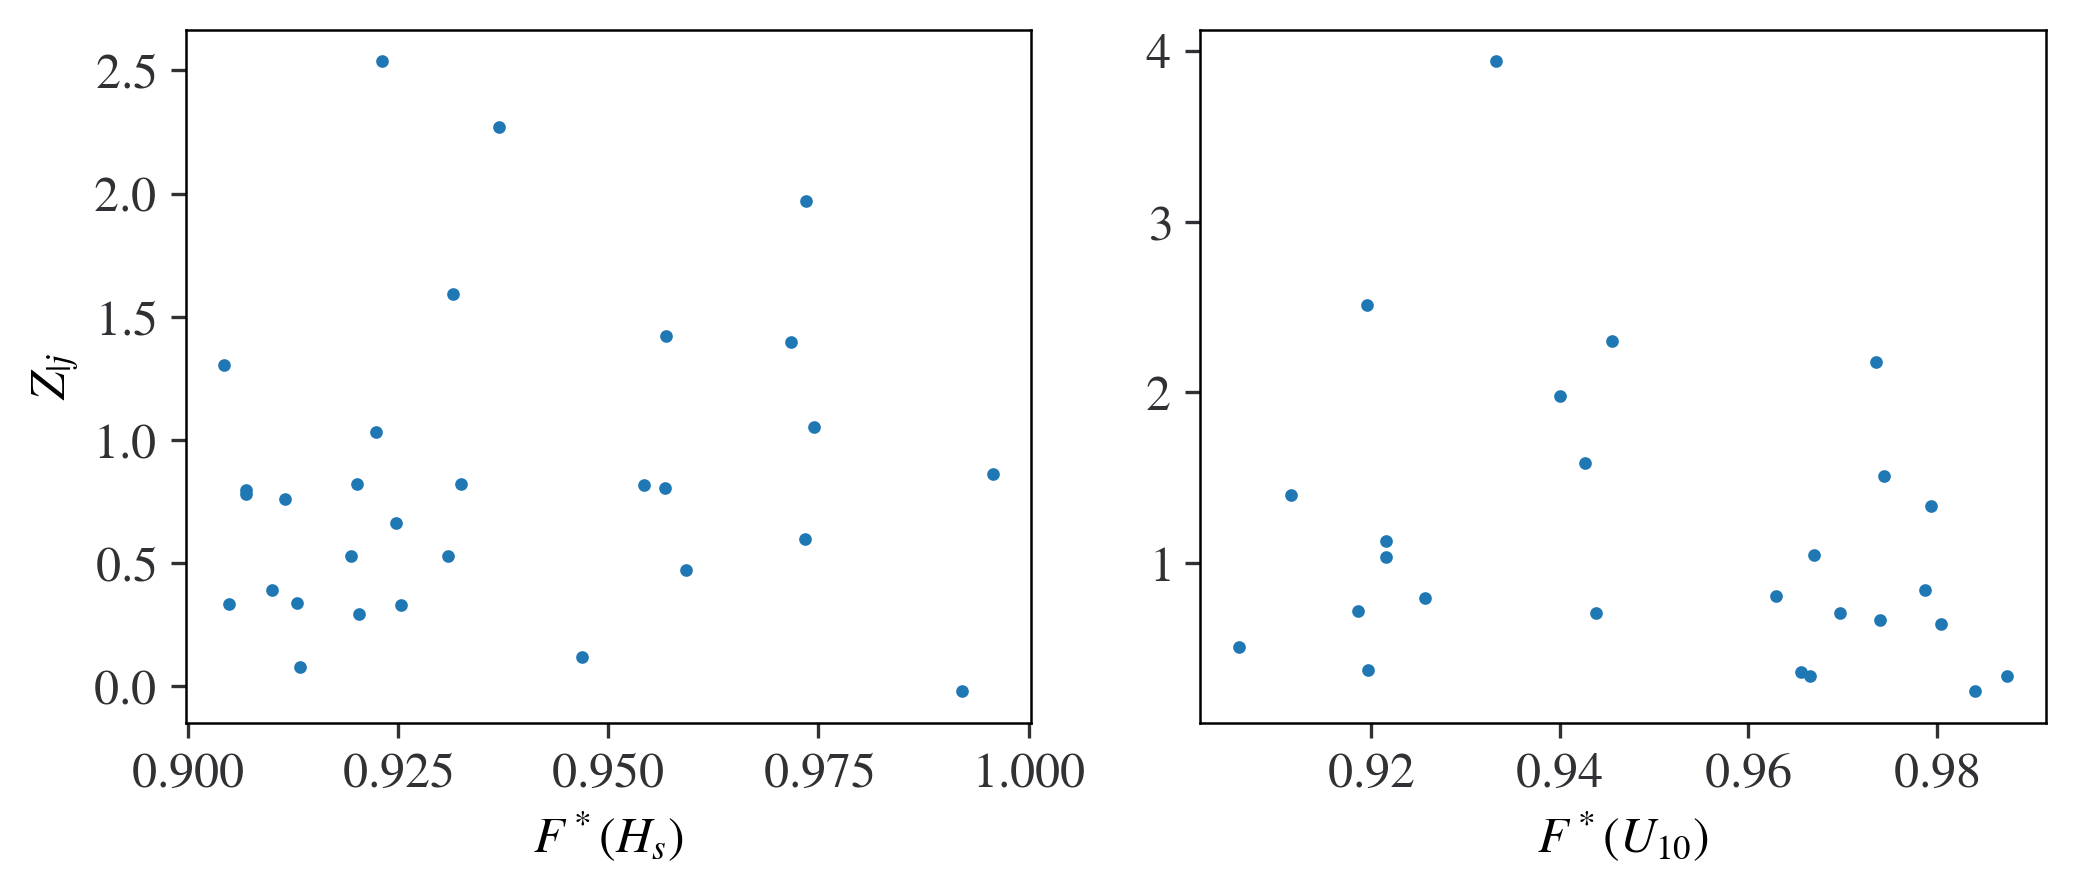

In [21]:
grapher_condition.draw("Residuals")

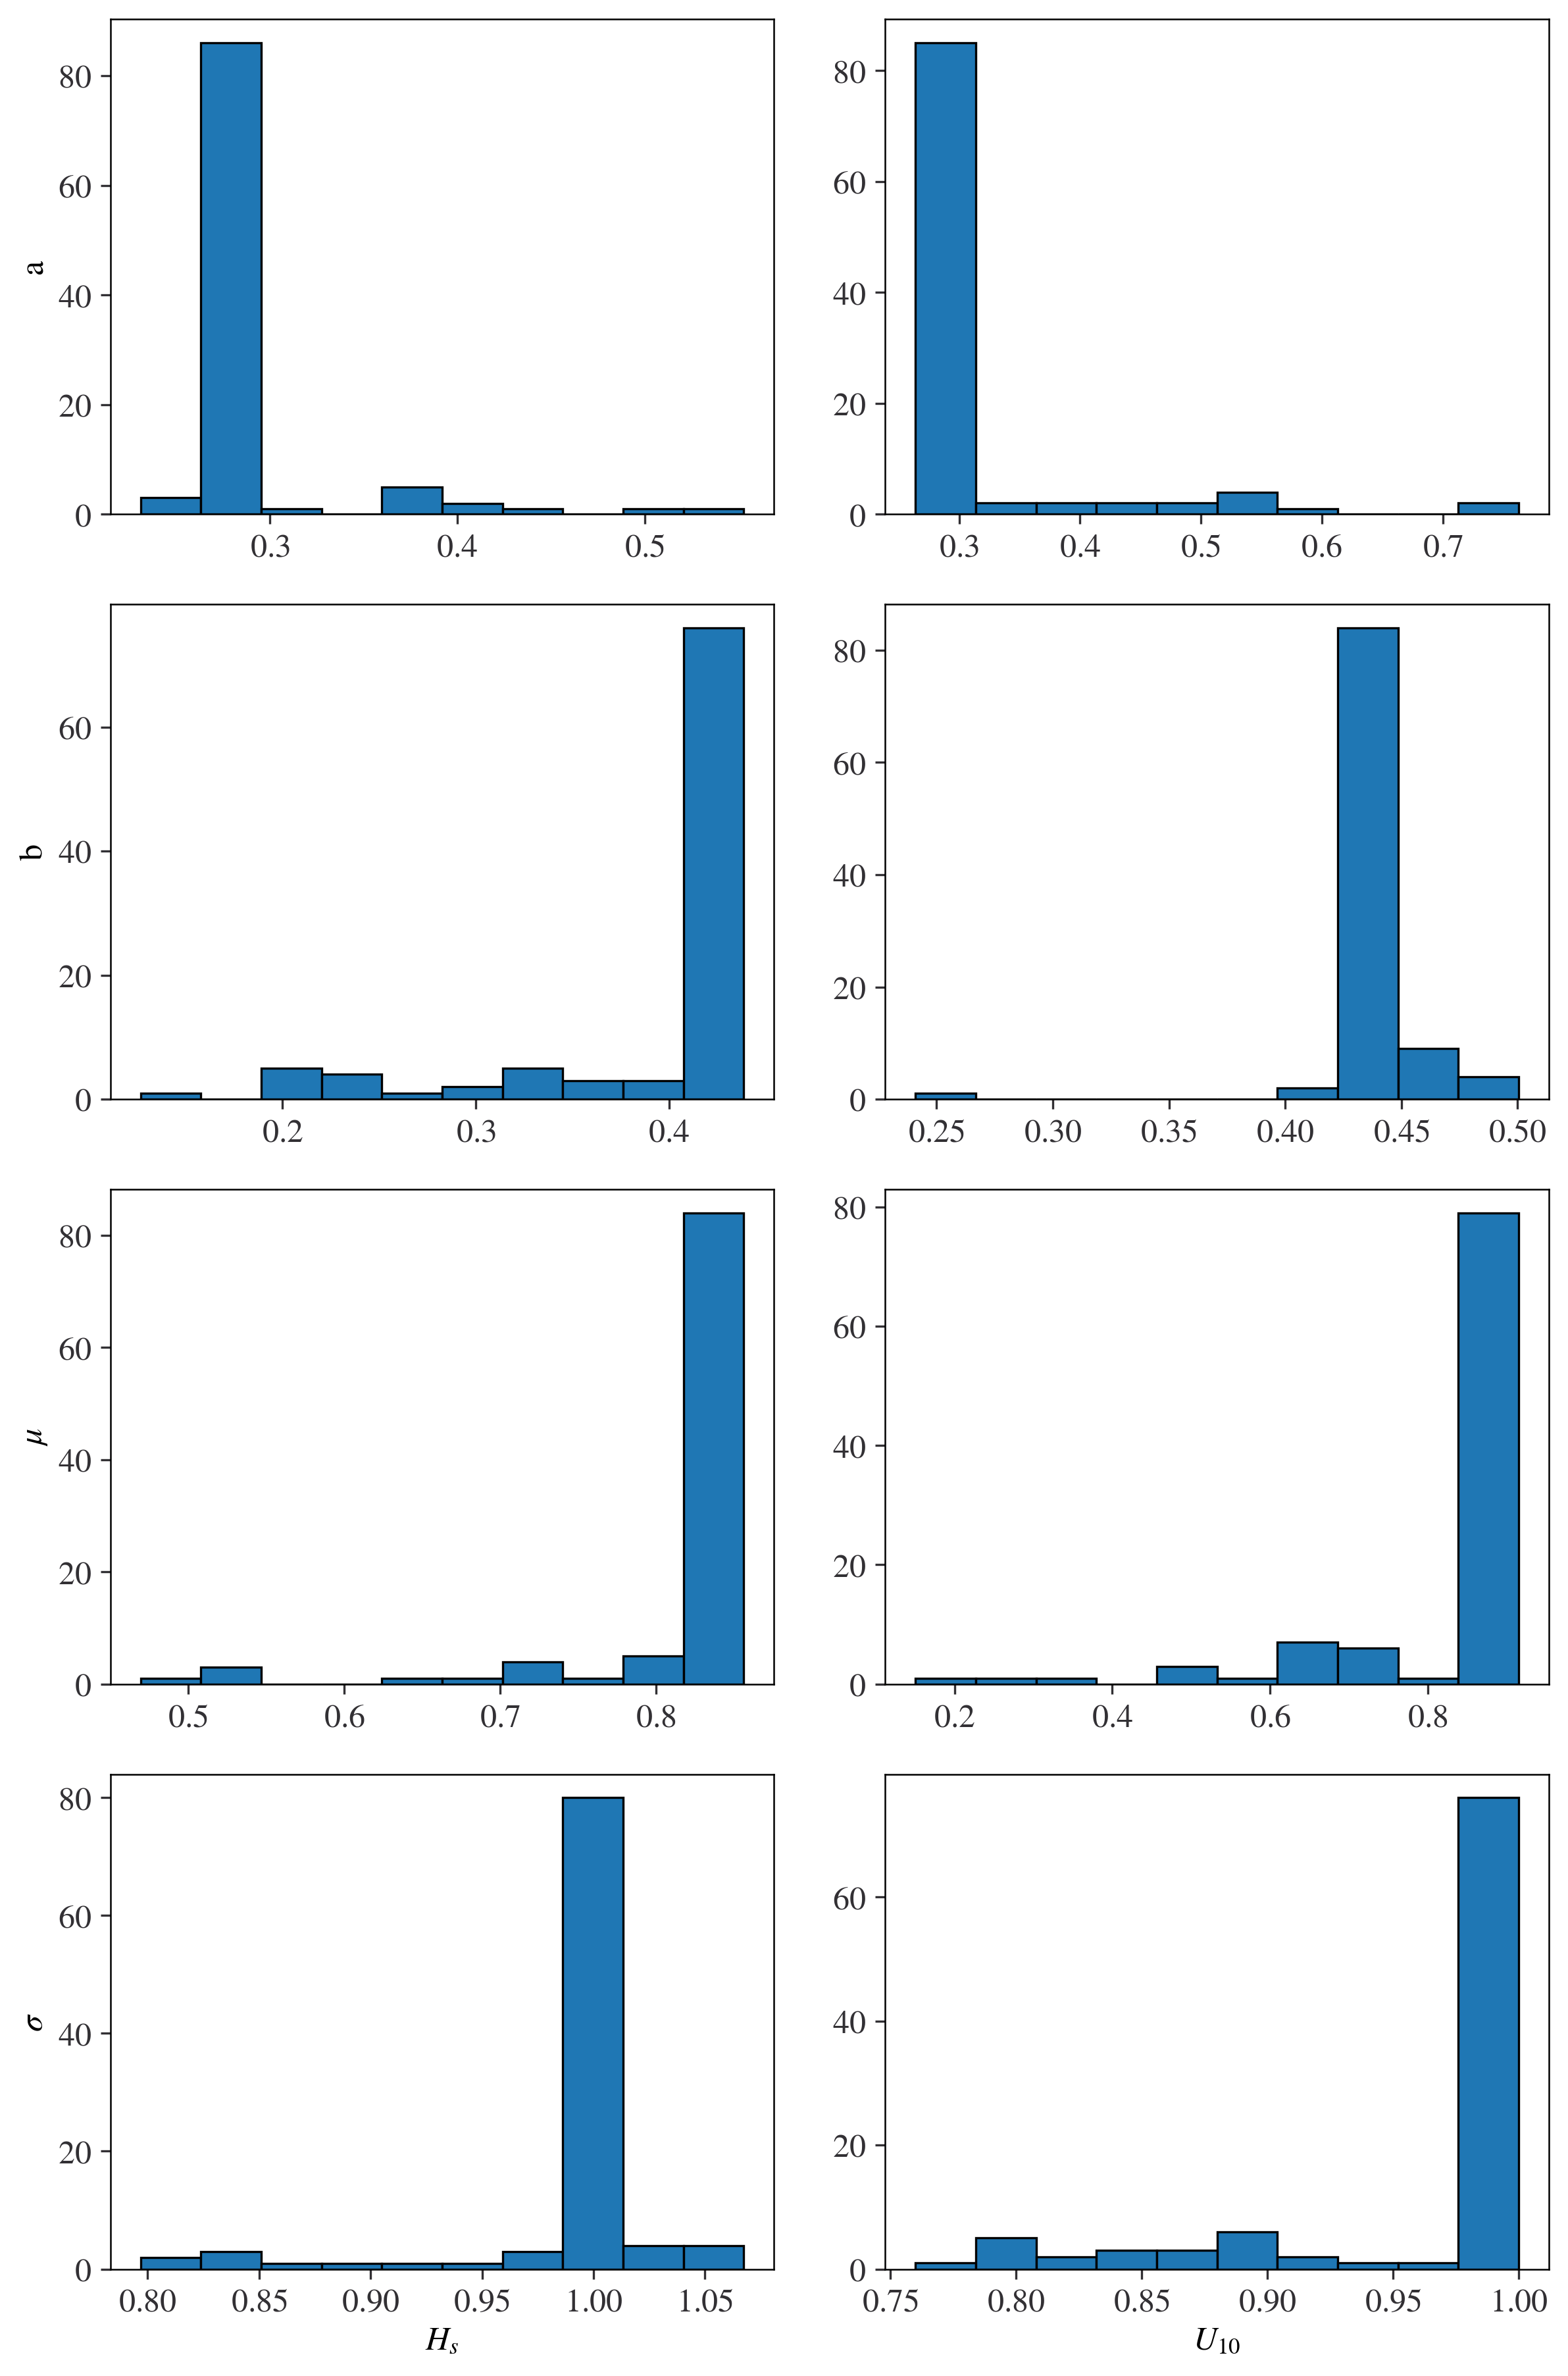

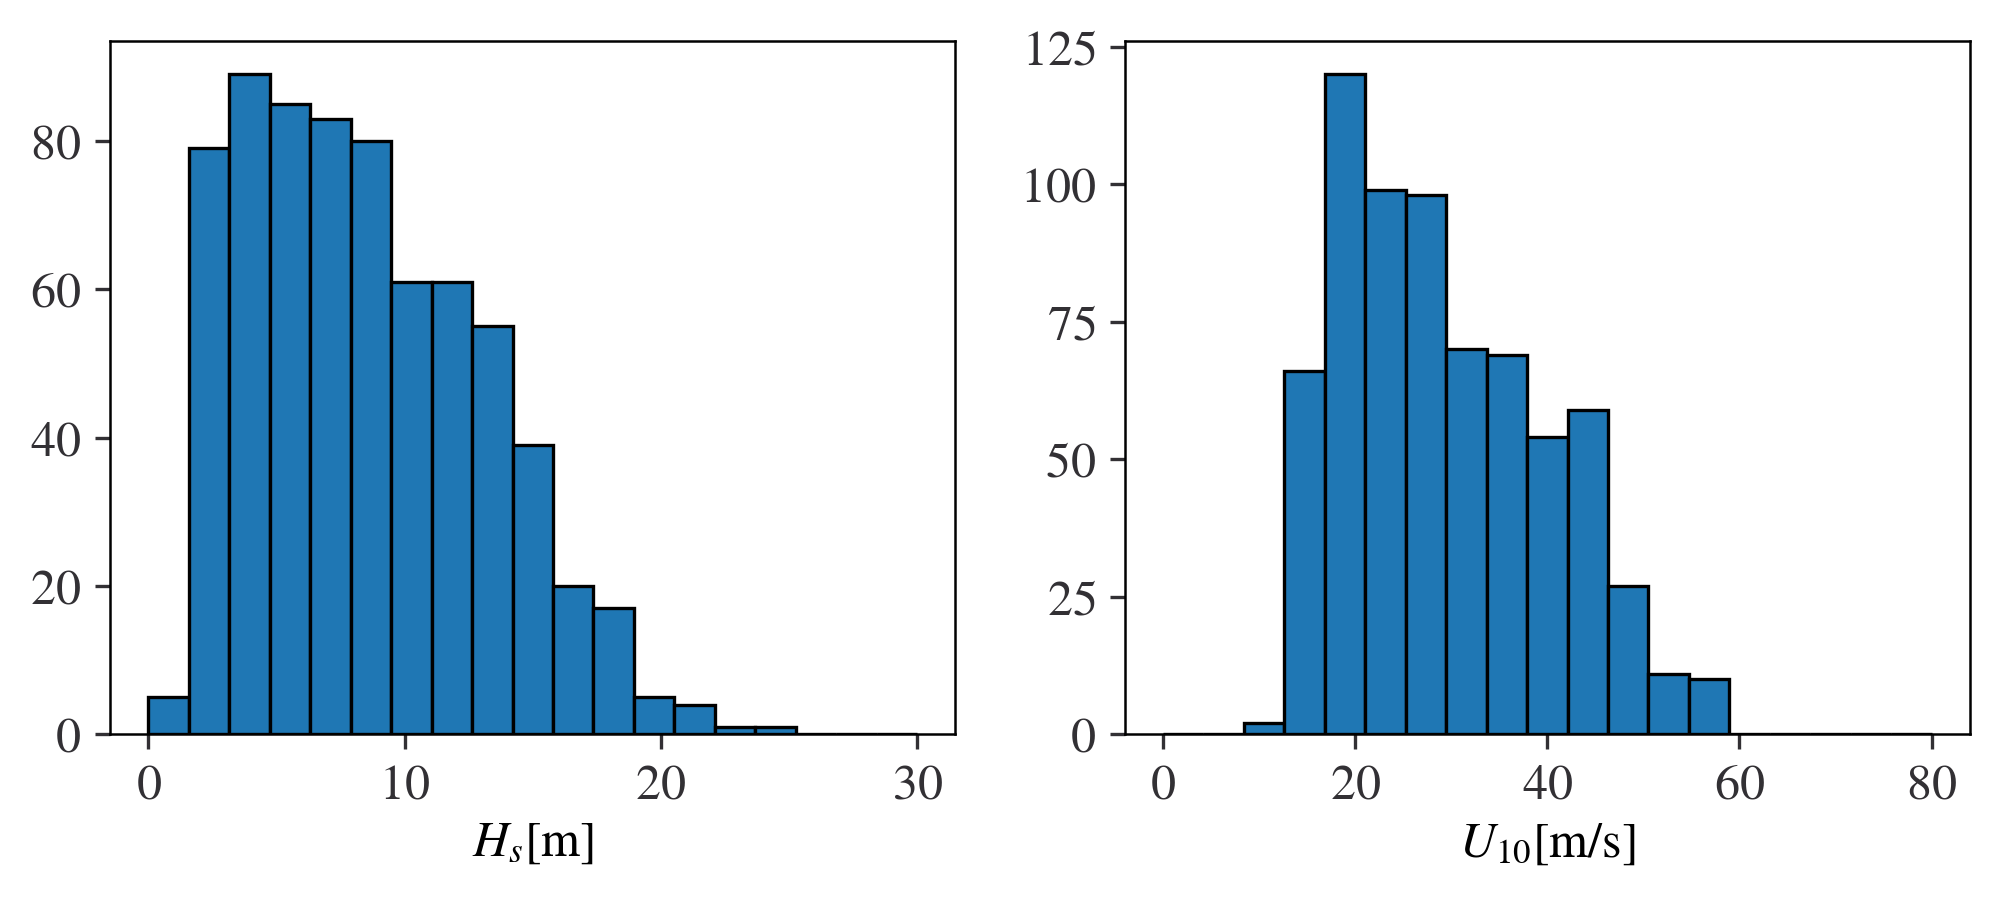

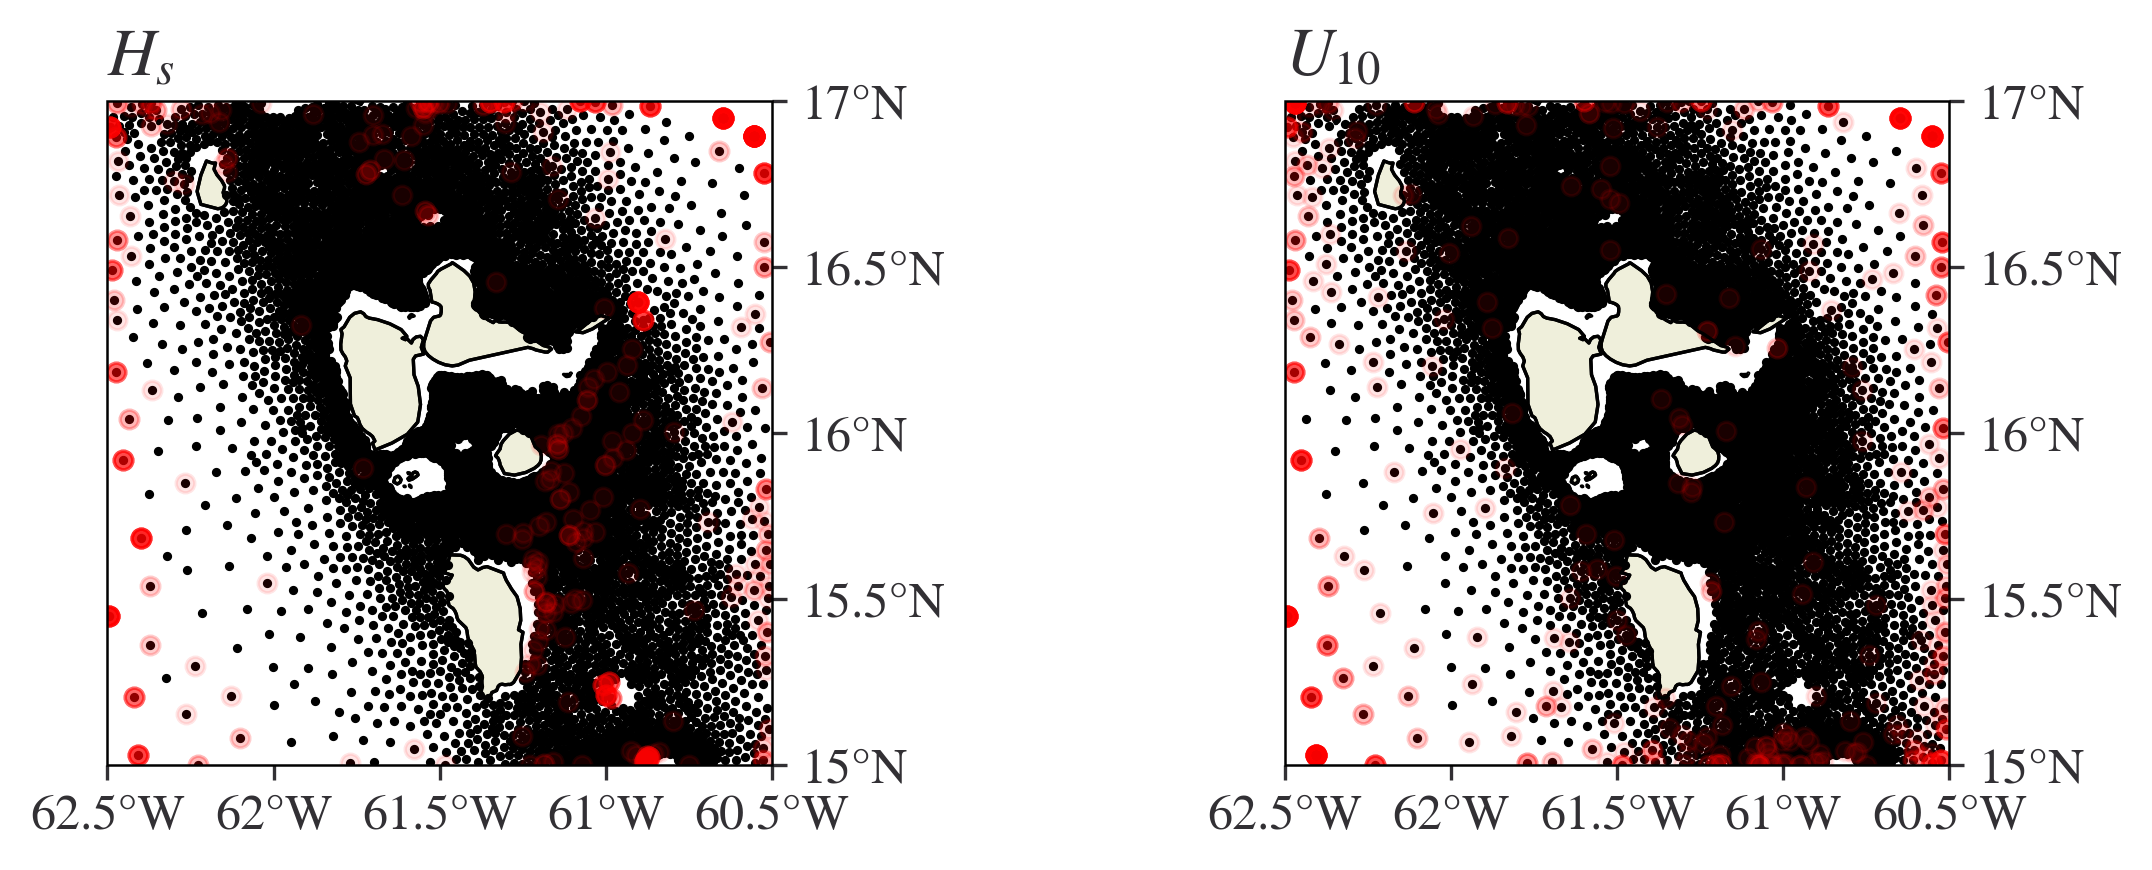

In [13]:
_ =grapher_condition.draw("Conmul_Estimates",draw_fig=True)
_ =grapher_condition.draw("STM_Histogram",draw_fig=True)
_ =grapher_condition.draw("STM_location",draw_fig=True)

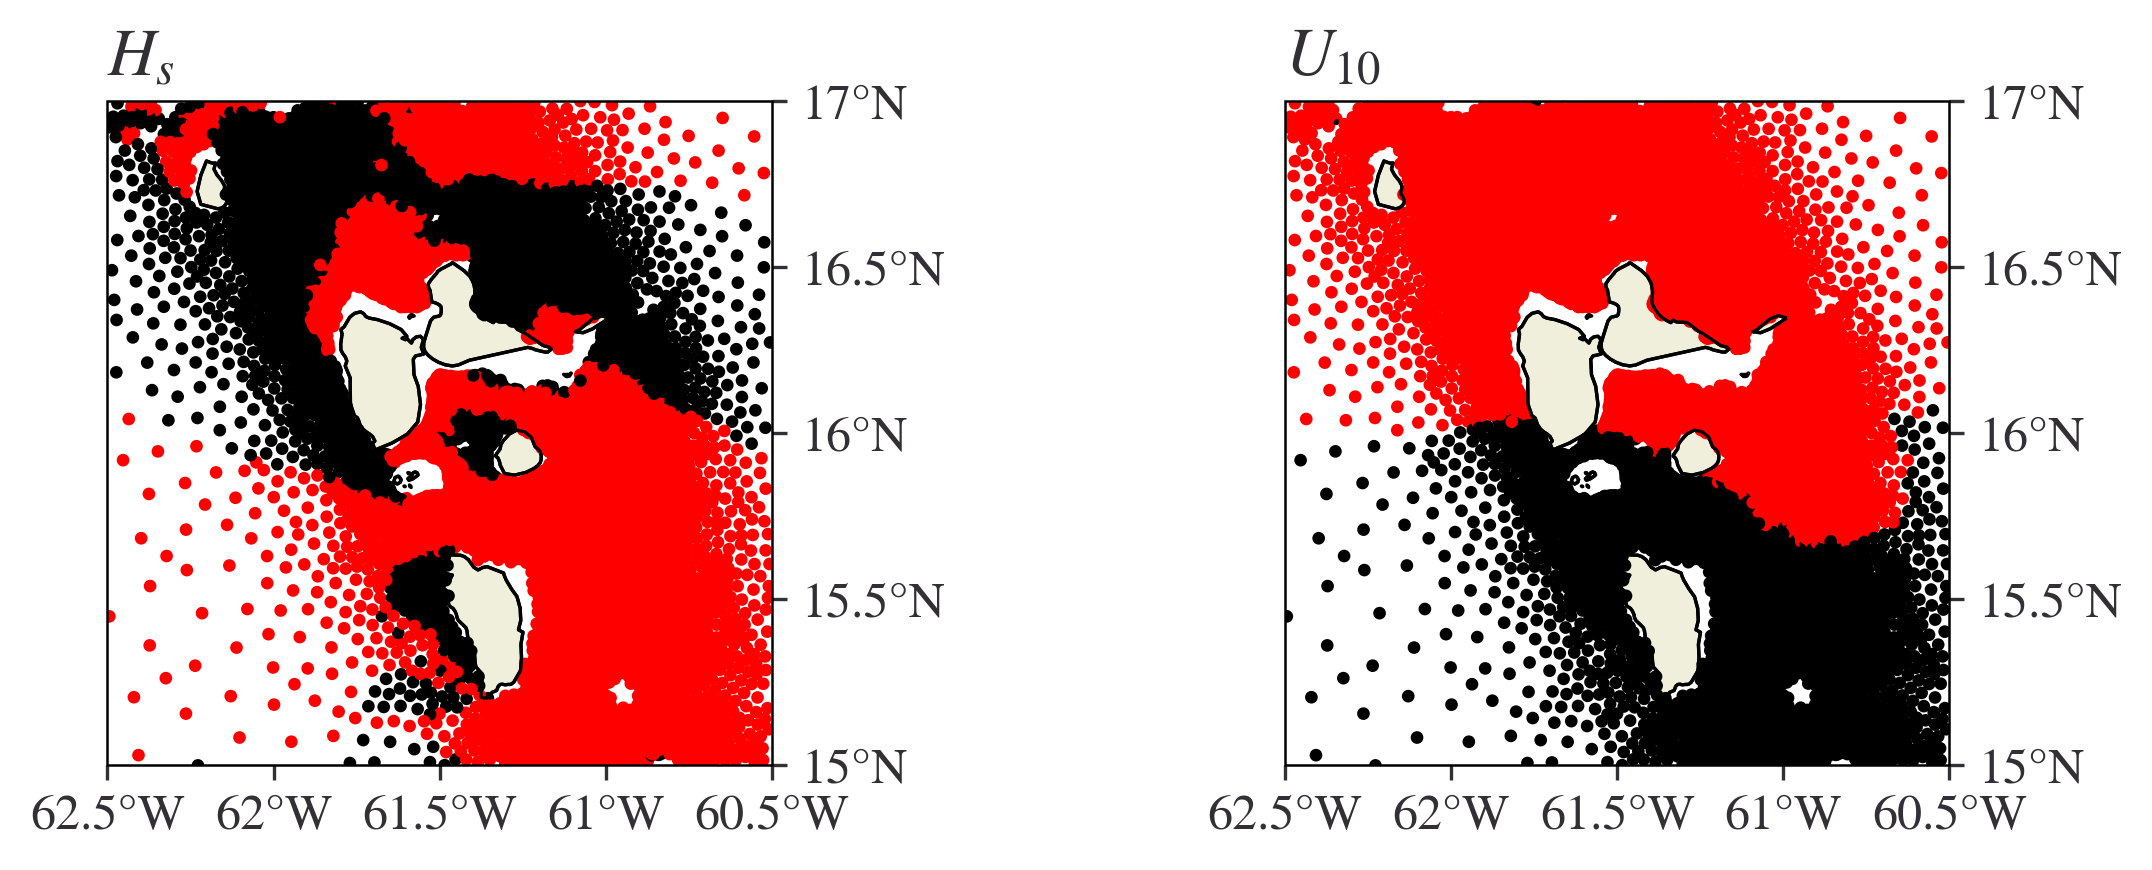

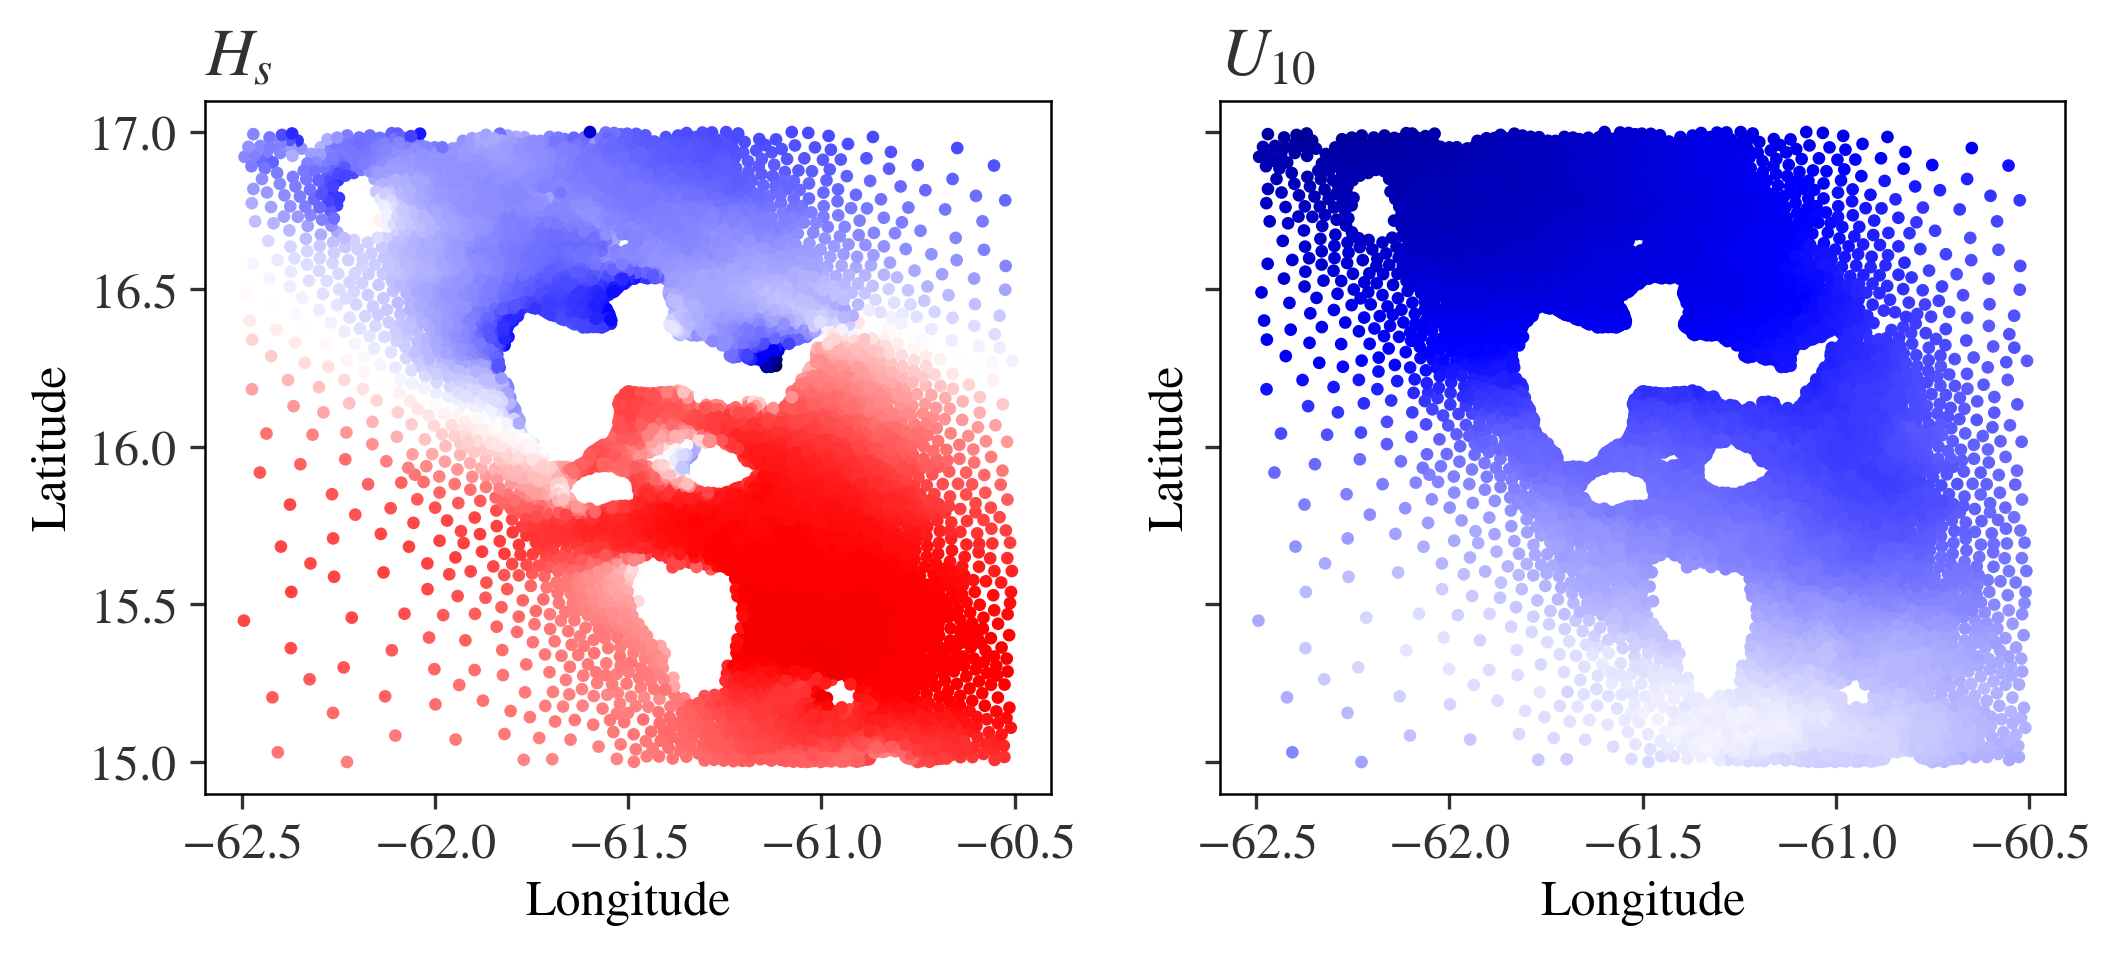

In [11]:
_ =grapher_condition.draw("Kendall_Tau_marginal_pval",draw_fig=True)
_ =grapher_condition.draw("Kendall_Tau_marginal_tval",draw_fig=True)

In [20]:
N_subsample=1000
N_year_pool=200
path_mstme_ss_dill = path_out_condition.joinpath(
    fr"mstme_ss_{N_subsample}_pool_{N_year_pool}.dill"
)
if path_mstme_ss_dill.exists():
    with open(path_mstme_ss_dill, "rb") as f:
        tm_MSTME_ss, stm_MSTME_ss = dill.load(f)

In [7]:
grapher_condition.draw("RV_STM",return_period=100,stm_MSTME_ss=stm_MSTME_ss, draw_fig=True,dir_out=None)

NameError: name 'stm_MSTME_ss' is not defined

In [8]:
mstme_condition.gp_params.shape

(2, 100, 3)

In [73]:
for vi in [0,1]:
  print(["Hs","U"][vi])
  gp_params = mstme_condition.gp_params[vi]
  # xi,mu,sigma
  mean = np.mean(gp_params,axis=0).round(3)
  stdv = np.std(gp_params,axis=0).round(3)
  lower = np.percentile(gp_params,5,axis=0)
  upper = np.percentile(gp_params,95,axis=0)
  # print("\txi,mu,sigma=")
  # print("\tMean\t",mean.round(3))
  # print("\tStDev\t",stdv.round(3))
  # print("\t 5%\t", (mean-lower).round(3))
  # print("\t95%\t", (mean-upper).round(3))
  for i in range(3):
    print(fr"{mean[i]}({stdv[i]})")


Hs
-0.355(0.126)
6.997(0.05)
4.824(0.816)
U
-0.378(0.106)
26.122(0.096)
13.357(1.97)


In [72]:
for vi in [0,1]:
  print(["Hs","U"][vi])
  cm_params = mstme_condition.params_uc[vi]
  # a,b,mu,sigma
  mean = np.mean(cm_params,axis=0).round(3)
  stdv = np.std(cm_params,axis=0).round(3)
  lower = np.percentile(cm_params,5,axis=0)
  upper = np.percentile(cm_params,95,axis=0)
  for i in range(4):
    print(fr"{mean[i]}({stdv[i]})")


Hs
0.542(0.246)
0.647(0.216)
0.513(0.311)
0.568(0.085)
U
0.601(0.219)
0.445(0.225)
0.506(0.307)
0.673(0.112)
